### Background
In 1965, the US Supreme Court reduced all death sentences to life imprisonment, describing capital punishment as a 'cruel and unusual punishment' which violates the Constitution. In 1976 however, the court introduced a new set of statutes with Gregg v. Georgia, reaffirming the US Supreme Court's acceptance of using the death penalty. Although there have been significant reforms made since, such as improvements in the quality of capital defense, some states continue to carry out executions. This has caused a great level of controversy, especially regarding the influence of racism, mental illness, intellectual disability, biased police investigations, prosecutorial misconduct and alike - it is difficult to investigate such matters, since data on these issues is not publicly available or not at all investigated. 

'The Condemned' is a list of individuals from 29 states of the US sentenced to death row since 1976, aiming to investigate bias in the death row system and its failures. They concluded it is a failed public policy; of the 7335 entries, 1448 people have been executed, i.e. 20% of the total. This means around 80% of prosecutions required readjudication.

Information about the dataset can be found at: https://theintercept.com/2019/12/03/death-penalty-capital-punishment-data/ <sup>(1)</sup>

The death penalty is widely viewed as an inhumane and flawed procedure. The dataset collected a wide range of demographic data which allows for further investigation regarding discrimination against defendants based on demographics such as gender, race, age and state.


Rather than focusing on any particular aspect of the data, we will be providing an overall analysis regarding the following question: ***Is the death row system flawed?*** We will be considering many aspects of the data set to answer this question, with a focus on prejudice:
- Are there any particular characteristics which predispose a person to a higher likelihood of execution, resentencing or death by other means? (For example, race, gender, age, etc)
- Are there any states in which death row is especially unfair and prejudiced? 

We will focus on personal characteristics: Race, Gender and Age,
As well as contextual factors such as: Mental illness due to child abuse, Finance, Homelessnes and Education


Our hypotheses are the following:

_race_  :  There will be a difference in the proportions of races on death row and executed

_Gender_ : More males will be on death row and a higher proportion of males will be executed

_Age_  :   There will be a difference in the proportion of people on death row and executed between different ages

_Location_ : 

. States with higher child abuse victims will be the states with higher proportions of people on death row.

. States with lower incomes will be the states with higher proportions of people on death row.

. States with higher homelessness rates will be the states with higher proportions of people on death row.

. States with lower maths and reading grades will be the states with higher proportions of people on death row.



### Sourcing The Data
The data was initially found on the 'Data Is Plural' Google Docs document, which contains a range of different data sets: https://docs.google.com/spreadsheets/d/1wZhPLMCHKJvwOkP4juclhjFgqIY8fQFMemwKL2c64vk/edit#gid=0  <sup>(2)</sup>

The original source of the data set is 'The Condemned Dataset' on github: https://github.com/firstlookmedia/the-condemned-data?fbclid=IwAR1Vufp2iXCJCdTu8qBANnSiavR8hXceOVCNAwL7yeeQKf_Lyoqt4GdVSRI <sup>(3)</sup>


In [1]:
#importing necessary libraries for later data analysis
import numpy as np
import matplotlib.pyplot as plt
# import scipy statistics library to help with mathmeteical problems we have and get necessary statistics like pearsons correlaiton
from scipy import stats
from scipy.stats.stats import pearsonr
# import a Ipython magic command to embed static images of the plot in the notebook to aid visualisation
%matplotlib inline
# specify the style of graph we want
plt.style.use('fivethirtyeight')
import pandas as pd

The data frame below has 1 row per person on death row, along with 21 columns giving more information about each person.

In [2]:
deathrow = pd.read_csv('the-condemed-data.csv')
deathrow.head()

,Status,state,sentencing_date,sentencing_year,full_name,last_name,first_name,race,County,DOB,...,currently_on_death_row,executed,volunteer_execution,died,suicide,commuted,exonerated,resentenced,current_sentence,released
0,Not Currently on Death Row,AL,08/17/1976,1976.0,Donald Thigpen,Thigpen,Donald,Black,Escambia,1952,...,N,N,NaN,NaN,NaN,NaN,NaN,Y,LPP,NaN
1,Not Currently on Death Row,AL,11/22/1976,1976.0,Jerry Wayne Jacobs,Jacobs,Jerry,White,Blount,1949,...,N,N,NaN,NaN,NaN,NaN,NaN,Y,LWOP,NaN
2,Not Currently on Death Row,AL,11/22/1976,1976.0,John Lewis Jacobs,Jacobs,John,White,Blount,NaN,...,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Not Currently on Death Row,AL,1977,1977.0,James Willie Cochran,Cochran,James,Black,Jefferson,1943,...,N,N,NaN,NaN,NaN,NaN,Y,Y,DR,Y
4,Not Currently on Death Row,AL,1977,1977.0,Tommy Lewis,Lewis,Tommy,Black,Coffee,1951,...,N,N,NaN,NaN,NaN,NaN,NaN,Y,LWOP,NaN


In [3]:
#the number of rows and columns:
deathrow.shape

(7335, 21)

### About the Dataset
Our dataset provides comprehensive information regarding the individuals sent to death row in 29 states of the US, from 2 July, 1976 to 30 November, 2019<sup>(1)</sup>. It includes information about each person in terms of whether they are currently on death row or not, if they have been executed already, what state they reside in, when they were sentenced, their current sentence, full name, race, county, date of birth and gender. It also states if they volunteered to die, committed suicide, have been commuted, exonerated, resentenced or released. 

The following Glossary is to clear up the meaing of some of the terms used in the above columns:

In [4]:
#all column names:
deathrow.columns

Index(['Status', 'state', 'sentencing_date', 'sentencing_year', 'full_name',
       'last_name', 'first_name', 'race', 'County', 'DOB', 'gender',
       'currently_on_death_row', 'executed', 'volunteer_execution', 'died',
       'suicide', 'commuted', 'exonerated', 'resentenced', 'current_sentence',
       'released'],
      dtype='object')

In [5]:
#explained column names:
Glossary = pd.DataFrame({'Column Name': ['Status', 'sentencing_date', 'volunteer_execution', 'suicide', 'commuted', 'exonerated', 'resentenced', 'current_sentence'],
                        'Meaning': ['Whether they are currently on death row', 'When they were sentenced to death row', 'Whether they volunteered to be executed', 'Whether they committed suicide on death row', 'Whether they had their death sentences reduced by executive branch action', 'Individuals found to be innocent and released', 'Resentenced to time in prison instead of death row or vice versa', 'DR (death row), LWOP (life without parole), LPP (life without possibility of parole), Y (term of years), M (term of months), TIME (time served)']})
pd.set_option('display.max_colwidth',1)
Glossary

,Column Name,Meaning
0,Status,Whether they are currently on death row
1,sentencing_date,When they were sentenced to death row
2,volunteer_execution,Whether they volunteered to be executed
3,suicide,Whether they committed suicide on death row
4,commuted,Whether they had their death sentences reduced by executive branch action
5,exonerated,Individuals found to be innocent and released
6,resentenced,Resentenced to time in prison instead of death row or vice versa
7,current_sentence,"DR (death row), LWOP (life without parole), LPP (life without possibility of parole), Y (term of years), M (term of months), TIME (time served)"


## A Closer Look at The Data
Before we start our analysis, it is important to recognise a few factors:
- Are there any NaN (i.e. missing) values?
- Are there any repeated values?
- Are all data types correct? (E.g. are numeric values labelled correctly as int or float?)

These could potentially alter our results and thus should be looked at more closely.

In [6]:
# converting some of the values
deathrow['sentencing_date'] =  pd.to_datetime(deathrow['sentencing_date'])
deathrow['DOB'] =  pd.to_datetime(deathrow['DOB'])
deathrow['sentencing_year'] = pd.to_numeric(deathrow['sentencing_year'])

#check again to see if it is correct
deathrow.dtypes

#could potentially convert Y/N answers to Boolean.

Status                    object        
state                     object        
sentencing_date           datetime64[ns]
sentencing_year           float64       
full_name                 object        
last_name                 object        
first_name                object        
race                      object        
County                    object        
DOB                       datetime64[ns]
gender                    object        
currently_on_death_row    object        
executed                  object        
volunteer_execution       object        
died                      object        
suicide                   object        
commuted                  object        
exonerated                object        
resentenced               object        
current_sentence          object        
released                  object        
dtype: object

In [7]:

# investigating the amount of NaN values:
deathrow.isna().sum()

Status                    0   
state                     0   
sentencing_date           7   
sentencing_year           7   
full_name                 0   
last_name                 0   
first_name                0   
race                      0   
County                    10  
DOB                       816 
gender                    2   
currently_on_death_row    4   
executed                  4   
volunteer_execution       7203
died                      6743
suicide                   7232
commuted                  7267
exonerated                7203
resentenced               4962
current_sentence          4938
released                  7001
dtype: int64

- It is possible to convert some NaN values by having a closer look at the data, however some columns have over >6000 missing values, and with a total of 7335 entries, these columns are not very useful for data analysis.
- For now, columns with a lot of missing values will be ignored, however we can visit these later on if needed.

In [8]:
# setting an index to make it easier to edit the dataframe later on:
deathrow.index.name = 'number'
len(deathrow)

7335

- According to the information above, there are only 2 values missing for gender. We can fix this by looking at the corresponding name for the data and filling this information in manually.

In [9]:
# the two rows where gender is missing.
deathrow[deathrow['gender'].isnull()]
# as we can see they are both male names.

,Status,state,sentencing_date,sentencing_year,full_name,last_name,first_name,race,County,DOB,...,currently_on_death_row,executed,volunteer_execution,died,suicide,commuted,exonerated,resentenced,current_sentence,released
number,,,,,,,,,,,,,,,,,,,,,
921,On Death Row,CA,1980-01-17,1980.0,Harold Ray Memro,Memro,Harold,White,Los Angeles,1945-01-01,...,Y,N,NaN,NaN,NaN,NaN,NaN,Y,DR,NaN
4465,Not Currently on Death Row,OH,1976-11-19,1976.0,Albert Lee Scott,Scott,Albert,Other or Unknown,Montgomery,1934-01-01,...,N,N,NaN,NaN,NaN,NaN,NaN,Y,LPP,NaN


In [10]:
# filling in both missing values with 'Male'
deathrow['gender'] = deathrow['gender'].fillna('Male')
#to check if it worked, we will take the example of Harold
deathrow.iloc[920]
#we can see that under gender, it now says Male:

Status                    On Death Row       
state                     CA                 
sentencing_date           1979-11-30 00:00:00
sentencing_year           1979.0             
full_name                 James Anderson     
last_name                 Anderson           
first_name                James              
race                      Black              
County                    Riverside          
DOB                       NaT                
gender                    Male               
currently_on_death_row    Y                  
executed                  N                  
volunteer_execution       NaN                
died                      NaN                
suicide                   NaN                
commuted                  NaN                
exonerated                NaN                
resentenced               NaN                
current_sentence          NaN                
released                  NaN                
Name: 920, dtype: object

- The Intercept <sup>(1)</sup> states that there are at least 8 individuals who have been mentioned multiple times within the dataframe, due to being resentenced multiple times. We should have a closer look at this and delete any duplicates we find. However, we need to keep in mind that some people may have the same name. Therefore we should use a way to classify each person, e.g. according to race, since there are no NaN values for this and this should not change, unlike sentencing date etc. DOB is a bit less reliable, since there are some NaN values (816 to be exact).

In [11]:
#first try at identifying duplicates:
duplicates = deathrow[deathrow.duplicated(['full_name', 'race'])]

#sorted aplhabetically to identify each person easier:
name = duplicates['full_name']
multiples = deathrow[deathrow['full_name'].isin(name)]
multiples_sorted = multiples.sort_values(by = 'full_name')
print(len(multiples_sorted))
multiples_sorted.head(20)

93


,Status,state,sentencing_date,sentencing_year,full_name,last_name,first_name,race,County,DOB,...,currently_on_death_row,executed,volunteer_execution,died,suicide,commuted,exonerated,resentenced,current_sentence,released
number,,,,,,,,,,,,,,,,,,,,,
7327,Executed,VA,2008-01-01,2008.0,Alfredo Prieto,Prieto,Alfredo,Hispanic or Latino,Fairfax,1966-01-01,...,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1279,Not Currently on Death Row,CA,1992-06-16,1992.0,Alfredo Prieto,Prieto,Alfredo,Hispanic or Latino,San Bernardino,1966-01-01,...,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4517,Executed,OH,1985-05-06,1985.0,Alton Coleman,Coleman,Alton,Black,Hamilton,1955-11-06,...,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3187,Not Currently on Death Row,IN,1986-04-12,1986.0,Alton Coleman,Colemn,Alton,Black,Lake,1955-11-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6090,Not Currently on Death Row,TX,1979-04-18,1979.0,Charles Evans,Evans,Charles,Black,Harris,1952-06-09,...,N,N,NaN,NaN,NaN,NaN,NaN,Y,LPP,NaN
3191,Not Currently on Death Row,IN,1986-09-19,1986.0,Charles Evans,Evans,Charles,Black,Marion,1959-04-14,...,N,N,NaN,NaN,NaN,NaN,NaN,Y,180Y,NaN
1869,On Death Row,CA,2016-09-21,2016.0,Darnell Williams,Williams,Darnell,Black,Alameda,1991-02-11,...,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3194,Not Currently on Death Row,IN,1987-03-23,1987.0,Darnell Williams,Williams,Darnell,Black,Lake,1966-07-03,...,N,N,NaN,NaN,NaN,Y,NaN,NaN,LWOP,NaN
2566,Not Currently on Death Row,FL,1996-05-07,1996.0,David Carpenter,Carpenter,David,White,Pinellas,1962-04-14,...,N,N,NaN,NaN,NaN,NaN,NaN,Y,LWOP,NaN


As we can see, there are potentially 93 duplicates.
It is clear that there are some people with the same name and race e.g. Charles Evans, however there is a different DOB.

- Therefore, to identify true duplicates, we should now consider DOB using the dataframe above. However, due to missing values this will not be entirely accurate and there is no way to find out this information. We should remove these individuals from the above dataframe.

In [12]:
#individuals with no missing DOB
multiples_tosort = multiples_sorted[multiples_sorted['DOB'].notna()]
multiples_tosort.head()
#we now have a potential of 80 duplicates.

,Status,state,sentencing_date,sentencing_year,full_name,last_name,first_name,race,County,DOB,...,currently_on_death_row,executed,volunteer_execution,died,suicide,commuted,exonerated,resentenced,current_sentence,released
number,,,,,,,,,,,,,,,,,,,,,
7327,Executed,VA,2008-01-01,2008.0,Alfredo Prieto,Prieto,Alfredo,Hispanic or Latino,Fairfax,1966-01-01,...,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1279,Not Currently on Death Row,CA,1992-06-16,1992.0,Alfredo Prieto,Prieto,Alfredo,Hispanic or Latino,San Bernardino,1966-01-01,...,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4517,Executed,OH,1985-05-06,1985.0,Alton Coleman,Coleman,Alton,Black,Hamilton,1955-11-06,...,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3187,Not Currently on Death Row,IN,1986-04-12,1986.0,Alton Coleman,Colemn,Alton,Black,Lake,1955-11-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6090,Not Currently on Death Row,TX,1979-04-18,1979.0,Charles Evans,Evans,Charles,Black,Harris,1952-06-09,...,N,N,NaN,NaN,NaN,NaN,NaN,Y,LPP,NaN


In [13]:
# get a more accurate estimate by looking at DOB:
multiple_sorted = multiples_tosort[multiples_tosort.duplicated(['DOB'])]
#sorting alphabetically
name = multiple_sorted['full_name']
multiples = deathrow[deathrow['full_name'].isin(name)]
multiple_sort = multiples.sort_values(by = 'full_name')
multiple_sort.head()
#we now have 18 values left. This is a much more accurate estimate

,Status,state,sentencing_date,sentencing_year,full_name,last_name,first_name,race,County,DOB,...,currently_on_death_row,executed,volunteer_execution,died,suicide,commuted,exonerated,resentenced,current_sentence,released
number,,,,,,,,,,,,,,,,,,,,,
7327,Executed,VA,2008-01-01,2008.0,Alfredo Prieto,Prieto,Alfredo,Hispanic or Latino,Fairfax,1966-01-01,...,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1279,Not Currently on Death Row,CA,1992-06-16,1992.0,Alfredo Prieto,Prieto,Alfredo,Hispanic or Latino,San Bernardino,1966-01-01,...,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3187,Not Currently on Death Row,IN,1986-04-12,1986.0,Alton Coleman,Colemn,Alton,Black,Lake,1955-11-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4517,Executed,OH,1985-05-06,1985.0,Alton Coleman,Coleman,Alton,Black,Hamilton,1955-11-06,...,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2594,On Death Row,FL,1997-07-11,1997.0,Glen Edward Rogers,Rogers,Glen,White,Hillsborough,1962-07-15,...,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#the following shows the data which can be deleted:

#sort by date, so the most recent data is kept:
sort_bydate = multiple_sort.sort_values(by = 'sentencing_date')

individuals_delete = sort_bydate.drop_duplicates(subset = 'full_name', keep = 'first')

#apply this to whole dataframe
deathrow.drop(individuals_delete.index)

#we should also retrieve and delete those with NaN values for DOB mentioned earlier, and apply to whole df
nan_values = multiples_sorted[multiples_sorted['DOB'].isna()]

deathrow.drop(nan_values.index).head()

,Status,state,sentencing_date,sentencing_year,full_name,last_name,first_name,race,County,DOB,...,currently_on_death_row,executed,volunteer_execution,died,suicide,commuted,exonerated,resentenced,current_sentence,released
number,,,,,,,,,,,,,,,,,,,,,
0,Not Currently on Death Row,AL,1976-08-17,1976.0,Donald Thigpen,Thigpen,Donald,Black,Escambia,1952-01-01,...,N,N,NaN,NaN,NaN,NaN,NaN,Y,LPP,NaN
1,Not Currently on Death Row,AL,1976-11-22,1976.0,Jerry Wayne Jacobs,Jacobs,Jerry,White,Blount,1949-01-01,...,N,N,NaN,NaN,NaN,NaN,NaN,Y,LWOP,NaN
2,Not Currently on Death Row,AL,1976-11-22,1976.0,John Lewis Jacobs,Jacobs,John,White,Blount,NaT,...,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Not Currently on Death Row,AL,1977-01-01,1977.0,James Willie Cochran,Cochran,James,Black,Jefferson,1943-01-01,...,N,N,NaN,NaN,NaN,NaN,Y,Y,DR,Y
4,Not Currently on Death Row,AL,1977-01-01,1977.0,Tommy Lewis,Lewis,Tommy,Black,Coffee,1951-01-01,...,N,N,NaN,NaN,NaN,NaN,NaN,Y,LWOP,NaN


- We now have 7322 entries and have identified and deleted 9 duplicates. This is very close to the amount estimated by The Intercept, meaning it is very accurate. Therefore, we can say with a certainty that our 7322 entries are individual people and can investigate any trends.


- Further on in our analysis, we have identified two further issues with our dataset.
1. The 'executed' column seperates answers into 3 bins: 'N', 'N  ', and 'Y', which is a problem, as all 'N' answers should be classified as the same.
2. When looking at race, we noticed that 'White' and 'Black' values were also repeated twice.

In [15]:
# the original values in the data set for executions
list(deathrow['executed'].value_counts().index)

['N', 'Y', 'N ']

In [16]:
# the edited values

deathrow['executed'] = deathrow['executed'].replace(['N '], ['N'])
deathrow['executed'].value_counts()

N    5883
Y    1448
Name: executed, dtype: int64

In [17]:
# the original values, showing separated White and Black values
deathrow['race'].value_counts()

White                 3541
Black                 2882
Hispanic or Latino    683 
Native American       90  
Asian                 79  
Other or Unknown      45  
Black                 10  
White                 5   
Name: race, dtype: int64

In [18]:
# fixing the values
deathrow['race'] = deathrow['race'].replace(['White ', 'Black '], ['White', 'Black'])
deathrow['race'].value_counts()

White                 3546
Black                 2892
Hispanic or Latino    683 
Native American       90  
Asian                 79  
Other or Unknown      45  
Name: race, dtype: int64

In [19]:
race_variations = deathrow['race']
print(race_variations.describe()) 
print(race_variations.value_counts())

count     7335 
unique    6    
top       White
freq      3546 
Name: race, dtype: object
White                 3546
Black                 2892
Hispanic or Latino    683 
Native American       90  
Asian                 79  
Other or Unknown      45  
Name: race, dtype: int64


In [20]:
deathrow['gender'].value_counts()

Male      7193
Female    142 
Name: gender, dtype: int64

In [21]:
pd.crosstab(deathrow['gender'], deathrow['race'], normalize = 'index')

race,Asian,Black,Hispanic or Latino,Native American,Other or Unknown,White
gender,,,,,,
Female,0.021127,0.239437,0.063380,0.014085,0.000000,0.661972
Male,0.010566,0.397331,0.093702,0.012234,0.006256,0.479911


### A quick look into sentencing month

Making a copy of the data frame 'monthinv' to investigate how deathrow sentencing varies throughout the year. 

We then add a month column to the new dataframe

In [22]:
monthinv = deathrow.copy()
monthinv['sentencing_month'] = pd.DatetimeIndex(monthinv['sentencing_date']).month
monthinv.head()

,Status,state,sentencing_date,sentencing_year,full_name,last_name,first_name,race,County,DOB,...,executed,volunteer_execution,died,suicide,commuted,exonerated,resentenced,current_sentence,released,sentencing_month
number,,,,,,,,,,,,,,,,,,,,,
0,Not Currently on Death Row,AL,1976-08-17,1976.0,Donald Thigpen,Thigpen,Donald,Black,Escambia,1952-01-01,...,N,NaN,NaN,NaN,NaN,NaN,Y,LPP,NaN,8.0
1,Not Currently on Death Row,AL,1976-11-22,1976.0,Jerry Wayne Jacobs,Jacobs,Jerry,White,Blount,1949-01-01,...,N,NaN,NaN,NaN,NaN,NaN,Y,LWOP,NaN,11.0
2,Not Currently on Death Row,AL,1976-11-22,1976.0,John Lewis Jacobs,Jacobs,John,White,Blount,NaT,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
3,Not Currently on Death Row,AL,1977-01-01,1977.0,James Willie Cochran,Cochran,James,Black,Jefferson,1943-01-01,...,N,NaN,NaN,NaN,NaN,Y,Y,DR,Y,1.0
4,Not Currently on Death Row,AL,1977-01-01,1977.0,Tommy Lewis,Lewis,Tommy,Black,Coffee,1951-01-01,...,N,NaN,NaN,NaN,NaN,NaN,Y,LWOP,NaN,1.0


In [23]:
sentencing_month = monthinv['sentencing_month']
month_sorted = sentencing_month.sort_values()
month_counts = month_sorted.value_counts(normalize=False)
month_counts


11.0    708
5.0     696
3.0     678
10.0    654
6.0     629
4.0     612
1.0     595
12.0    595
2.0     574
9.0     545
7.0     538
8.0     504
Name: sentencing_month, dtype: int64

Text(0.5, 1.0, 'Number of people sentenced per month')

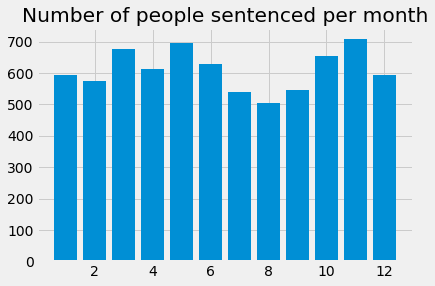

In [24]:
month_df = pd.DataFrame()
month_df['count'] = month_counts
month_df_indexed = month_df.reset_index()
month_df_renamed = month_df_indexed.rename(columns = {'index': 'month'})
month_df_month_order = month_df_renamed.sort_values('month', ascending = True)
month_df_month_order
plt.bar(month_df_month_order['month'], month_df_month_order['count'])
plt.title('Number of people sentenced per month')

There appears to be no significant variations between sentencing per month. It would be expected that each month would have around 611 sentences (7335 / 12). A Little variation is expected but all the months are within around 100 of this with no links between the seasons seen.  We will therefore swiftly move on from sentencing date.

### Executions

Lets make a dataframe for all of the people who were actually executed and work out the percentage that have been executed

In [25]:
deathrow.head()
deathrow['Status'].value_counts()

Not Currently on Death Row    3123
On Death Row                  2752
Executed                      1448
Not Currently On Death Row    12  
Name: Status, dtype: int64

In [26]:
Status_series = deathrow['Status'].copy()
executed = Status_series == 'Executed'
percent_executed = np.count_nonzero(executed) / len(Status_series) *100
percent_executed

19.740967961826858

In [27]:
# making a data frame with death row per state and proportion of people on death row per state
total_death_r = len(deathrow)
most_state_deathrow_series = deathrow['state'].value_counts()
only_state = pd.DataFrame()
only_state['death_row_per_state'] = most_state_deathrow_series
only_state['proportion_deathrow_per_state'] = only_state['death_row_per_state'] / total_death_r
only_state = only_state.reset_index()
only_state = only_state.rename(columns = {'index': 'state'})
only_state.head()

,state,death_row_per_state,proportion_deathrow_per_state
0,TX,1068,0.145603
1,CA,995,0.135651
2,FL,992,0.135242
3,AL,465,0.063395
4,PA,412,0.056169


Text(0.5, 1.0, 'Proportion of people on death row per state (top 10)')

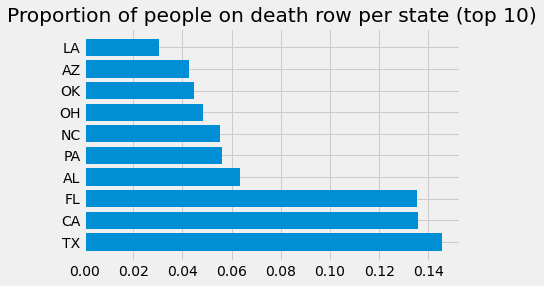

In [28]:
# top 10
top_10_deathrow = only_state.head(10)
plt.barh(top_10_deathrow['state'], top_10_deathrow['proportion_deathrow_per_state'])
plt.title('Proportion of people on death row per state (top 10)')

Lets see if the proportions of people actually executed per state are similar to the proportions on death row per state

In [29]:
executed_df = deathrow[executed].copy()
executed_df.head()

,Status,state,sentencing_date,sentencing_year,full_name,last_name,first_name,race,County,DOB,...,currently_on_death_row,executed,volunteer_execution,died,suicide,commuted,exonerated,resentenced,current_sentence,released
number,,,,,,,,,,,,,,,,,,,,,
7,Executed,AL,1977-05-03,1977.0,John Louis Evans III,Evans,John,White,Mobile,1950-01-01,...,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Executed,AL,1977-05-03,1977.0,Wayne Eugene Ritter,Ritter,Wayne,White,Mobile,1954-01-01,...,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Executed,AL,1977-08-08,1977.0,Brian Keith Baldwin,Baldwin,Brian,Black,Monroe,1958-07-16,...,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Executed,AL,1977-09-07,1977.0,Thomas Warren Whisenhant,Whisenhant,Thomas,White,Jefferson,1947-01-29,...,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Executed,AL,1977-11-01,1977.0,J.B. Hubbard,Hubbard,J.B.,White,Tuscaloosa,1930-01-01,...,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
print(len(executed_df))
executed_series = executed_df['state'].value_counts()
executed_series

1448


TX        559
OK        114
VA        112
MO        89 
FL        88 
GA        70 
AL        66 
OH        57 
SC        43 
NC        43 
AZ        38 
AR        31 
LA        28 
MS        21 
IN        20 
CA        13 
NV        12 
TN        10 
UT        6  
SD        5  
NE        4  
US GOV    4  
KY        3  
PA        3  
ID        3  
MT        2  
OR        2  
WY        1  
CO        1  
Name: state, dtype: int64

In [31]:
prop_exc_per_state = executed_series / len(executed_df)
prop_exc_per_state.head()

TX    0.386050
OK    0.078729
VA    0.077348
MO    0.061464
FL    0.060773
Name: state, dtype: float64

In [32]:
prop_exc_df = pd.DataFrame()
prop_exc_df['proportion_executed'] = prop_exc_per_state
prop_exc_df_set_index = prop_exc_df.reset_index()
prop_exc_df_renamed = prop_exc_df_set_index.rename(columns = {'index': 'state'})
prop_exc_df_renamed.head()

,state,proportion_executed
0,TX,0.386050
1,OK,0.078729
2,VA,0.077348
3,MO,0.061464
4,FL,0.060773


Text(0.5, 1.0, 'Proportion of people executed per state')

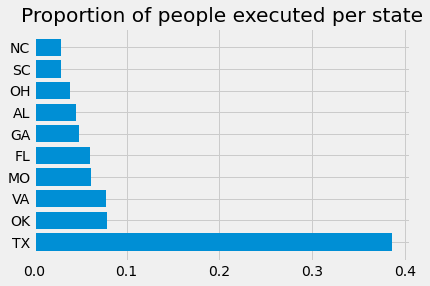

In [33]:
# top 10
top_10_exc = prop_exc_df_renamed.head(10)
plt.barh(top_10_exc['state'], top_10_exc['proportion_executed'])
plt.title('Proportion of people executed per state')

Lets see the states with thte biggest differences in proportion on deathrow compared to proportion executed

In [34]:
merged_prop_dr_prop_exc = prop_exc_df_renamed.merge(only_state, on='state')
merged_prop_dr_prop_exc['deathrow_vs_executed_difference'] = merged_prop_dr_prop_exc['proportion_executed'] - merged_prop_dr_prop_exc['proportion_deathrow_per_state']
merged_prop_dr_prop_exc.sort_values('deathrow_vs_executed_difference')

,state,proportion_executed,death_row_per_state,proportion_deathrow_per_state,deathrow_vs_executed_difference
15,CA,0.008978,995,0.135651,-0.126673
4,FL,0.060773,992,0.135242,-0.074469
23,PA,0.002072,412,0.056169,-0.054097
9,NC,0.029696,405,0.055215,-0.025519
17,TN,0.006906,195,0.026585,-0.019679
6,AL,0.045580,465,0.063395,-0.017815
10,AZ,0.026243,313,0.042672,-0.016429
16,NV,0.008287,164,0.022359,-0.014071
12,LA,0.019337,224,0.030539,-0.011201
7,OH,0.039365,356,0.048534,-0.009170


Most states as expected have similar differences in proportions of people on deathrow vs proportions of people executed. However Texas stands out with a 24% difference, along with California and Florida having nearly 13% and 7% less people executed than would be expected from the number of people on deathrow from these states.

Why are so many more people from Texas being executed and why are so many less people from California and Florida being executed? 
We will explore possible factors that may play a role in firstly, someone ending up on deathrow and secondly, someone being executed once on death row.

14% of all deathrow people are from Texas but 38.6% of executed people are from Texas.

*Brent Newton ('Capital Punishment: Texas Could Learn a Lot from Florida')* <sup>(4)</sup> states there are many unique aspects about this state's judicial system that enable it to execute a very high frequency of individuals. For example:
- Their appellate judges are **elected** to office, which means that they are chosen according to whoever will serve to please the public - they require a **record of toughness** on criminals to win re-election.These judges are often of a lesser quality than in other states and do not tend to consider the complexities of each case. Newton argues evidence for this comes from the fact that **the Texas Court of Criminal Appeals refuses to publish most of their decisions regarding death row cases**, rarely writing "thoughtful, scholarly decisions, whether granting or denying relief." Furthermore, Newton also states that they often dismiss **habeas corpus appeals**; these are reviews of the **legality** of an individual's incarceration, for example if there are any unanswered questions regarding the defendant's guilt. This is important, as The Intercept states that **32%** of the total cases listed in the data set were so flawed that they required court intervention.
- Until the early 1990s, Texas did not allow jurors to consider **mitigating evidence** (i.e. extenuating circumstances) during sentencing. This means there may be individuals on death row who should not be there, such as those who are mentally ill. One's **mental health** can greatly affect whether they are actually morally accountable for their actions, as it affects how they think, perceive, feel and relate to others. In normal circumstances, this may permit someone to be incompetent for execution. This poses a major ethical dilemma. 
The influence of mental health should be explored further in order to see whether it may cause injustice in the sentencing process. 

The factors we will explore are:
- Race
- Gender
- Year of sentencing and age
- Finance
- Child abuse
- Education
- Homelessness
- Exonerations

# Lets see if the difference in races executed look normal

In [35]:
# first we get the columns we need from the data frame
race_execution_df = deathrow.loc[ : ,['race', 'executed']].copy()
race_execution_df.head()

,race,executed
number,,
0,Black,N
1,White,N
2,White,N
3,Black,N
4,Black,N


In [36]:
race_execution_df['race'].value_counts()

White                 3546
Black                 2892
Hispanic or Latino    683 
Native American       90  
Asian                 79  
Other or Unknown      45  
Name: race, dtype: int64

In [37]:
race_execution_df['executed'].value_counts()

N    5883
Y    1448
Name: executed, dtype: int64

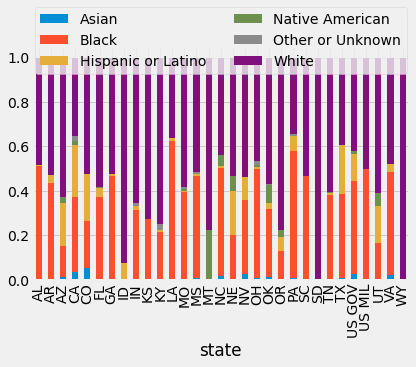

In [38]:
# visualising the proportions of each race executed per state
state_race = deathrow.copy()
state_s = state_race['state']
race_s = state_race['race'] 
race_state_counts = pd.crosstab(state_s, race_s, normalize='index')
race_state_counts.plot(kind = 'bar', stacked= True)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=2)

In [39]:
# see the proportions
pd.crosstab(race_execution_df['race'], race_execution_df['executed'], normalize='index')

executed,N,Y
race,,
Asian,0.898734,0.101266
Black,0.830450,0.169550
Hispanic or Latino,0.815520,0.184480
Native American,0.833333,0.166667
Other or Unknown,1.000000,0.000000
White,0.771727,0.228273


## Conclusion -> race and executions

Around 17% of blacks were executed, 17% of Native Americans, 18% of Hispanic, compared to around 23% of whites -> race doesn't seem to be playing a factor in if someone is executed.

But lets see if there are race differnces in inmates that are dying from other causes - prior to their execution.


In [40]:
df_died_race = deathrow.loc[ : ,['race', 'died']].copy()
df_died_race_na_to_no = df_died_race.fillna('no')
df_died_race_na_to_no.head()
pd.crosstab(df_died_race_na_to_no['race'], df_died_race_na_to_no['died'], normalize='index')

died,Y,no
race,,
Asian,0.050633,0.949367
Black,0.050138,0.949862
Hispanic or Latino,0.071742,0.928258
Native American,0.111111,0.888889
Other or Unknown,0.644444,0.355556
White,0.100113,0.899887


## Conclusion -> race and deaths

There does not seem to be any relationship either between race and dying from something other than execution.

However, 65% of the other or unknown category died before getting executed. This is peculiar, why did 65% of people in this category die, and why do we not know their race? Were the prison covering up race killings?

Lets isolate the other or unknown races

In [41]:
a = deathrow['race'] == 'Other or Unknown'
df_other_unk = deathrow[a]
df_other_unk.head()

,Status,state,sentencing_date,sentencing_year,full_name,last_name,first_name,race,County,DOB,...,currently_on_death_row,executed,volunteer_execution,died,suicide,commuted,exonerated,resentenced,current_sentence,released
number,,,,,,,,,,,,,,,,,,,,,
895,Not Currently on Death Row,CA,1978-05-02,1978.0,Gregory Teron Jr.,Teron,Gregory,Other or Unknown,Orange,NaT,...,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
964,Not Currently on Death Row,CA,1981-07-20,1981.0,Ronald Chester Hawkins,Hawkins,Ronald,Other or Unknown,Shasta,1946-06-07,...,N,N,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN
974,Not Currently on Death Row,CA,1981-11-04,1981.0,Gary Lee Guzman,Guzman,Gary,Other or Unknown,El Dorado,1947-01-01,...,N,N,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
981,Not Currently on Death Row,CA,1982-01-01,1982.0,George Carpenter,Carpenter,George,Other or Unknown,Los Angeles,1952-01-01,...,N,N,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN
1007,Not Currently on Death Row,CA,1982-07-26,1982.0,Mose Willis,Willis,Mose,Other or Unknown,Los Angeles,NaT,...,N,N,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN


They all have full names and majority have DOBs,  the deaths were recorded with the bodies identified.
However, in California prisons ‘racial categorization and subsequent segregation inflicted upon inmates’ takes place (Noll, 2011). Perhaps not identifying with a race gang leaves you open to attacks.

![Picture title](image-20210518-180652.png)

# Now lets see if the proportions of genders being executed look normal 
## Gender

In [42]:
gender_executed_df = deathrow.loc[ : ,['gender', 'executed']].copy()
gender_executed_df.head()

,gender,executed
number,,
0,Male,N
1,Male,N
2,Male,N
3,Male,N
4,Male,N


In [43]:
pd.crosstab(gender_executed_df['gender'], gender_executed_df['executed'])

executed,N,Y
gender,,
Female,126,16
Male,5757,1432


In [44]:
# Proportions of genders executed
cross_table_gender_executed = pd.crosstab(gender_executed_df['gender'], gender_executed_df['executed'], normalize='index')
cross_table_gender_executed

executed,N,Y
gender,,
Female,0.887324,0.112676
Male,0.800807,0.199193


20% execution rate of males compared to 11% of females may expose a gender as being an unconscious factor in the execution decision - let's explore this further with a permutation test

In [45]:
p_male_execution = cross_table_gender_executed.loc['Male', 'Y']
p_female_execution = cross_table_gender_executed.loc['Female', 'Y']
gender_proportion_diff = p_male_execution - p_female_execution
gender_proportion_diff

0.08651715551341153

could this difference of nearly 9% be due to chance. 
If gender was not a factor, and this was due to chance (the null world) it would not matter if the population were male or female, so we can randomise the populations genders and see if we end up with an execution proportion differnce of around 9%

Let's first simulate 1 trial in a null world

In [46]:
males = gender_executed_df['gender'] == 'Male'
females = gender_executed_df['gender'] == 'Female'


In [47]:
# combining males and females into 1 array 
only_male_df = gender_executed_df[males]
male_series = only_male_df['executed']
only_female_df = gender_executed_df[females]
female_series = only_female_df['executed']
pooled = np.append(male_series, female_series)
pooled

array(['N', 'N', 'N', ..., 'N', 'N', 'Y'], dtype=object)

We now randomize the array so each person has an equally likely chance of being assigned a 'Y' or 'N' to executed.

In [48]:
shuffled = np.random.permutation(pooled)
shuffled

array(['N', 'N', 'Y', ..., 'N', 'N', 'N'], dtype=object)

We make sure to keep the same number of males and females

In [49]:
no_of_male = len(male_series)
no_of_female = len(female_series)
print(no_of_male)
print(no_of_female)

7193
142


In [50]:
null_world_males = shuffled[ : no_of_male]
null_word_females = shuffled[no_of_male : ]
len(null_word_females)

142

In [51]:
fake_df = pd.DataFrame()
fake_df['gender'] = gender_executed_df['gender'].copy()
fake_df['executed'] = shuffled
fake_df.head()

,gender,executed
number,,
0,Male,N
1,Male,N
2,Male,Y
3,Male,N
4,Male,N


In [52]:
fake_crosstab = pd.crosstab(fake_df['gender'], fake_df['executed'], normalize='index')
fake_crosstab

executed,N,Y
gender,,
Female,0.746479,0.253521
Male,0.803589,0.196411


In [53]:
p_fake_male_execution = fake_crosstab.loc['Male', 'Y']
p_fake_female_execution = fake_crosstab.loc['Female', 'Y']
fake_gender_proportion_diff = p_fake_male_execution - p_fake_female_execution
fake_gender_proportion_diff

-0.05710994300760747

With each person, regardeless of gender, being equally likely to be assigned yes to execution, the gender proportion difference of executions is nearly 0 - meaning there is an equal chance of being executed, regardless of gender.

Remember, the real world difference was:

In [54]:
gender_proportion_diff

0.08651715551341153

Now, lets simulate this 1000 times to see just how likely it is to get this difference

In [55]:
fake_diffs = np.zeros(1000)
for i in np.arange(1000):
    shuffled = np.random.permutation(pooled)
    null_world_males = shuffled[ : no_of_male]
    null_word_females = shuffled[no_of_male : ]
    fake_df = pd.DataFrame()
    fake_df['gender'] = gender_executed_df['gender'].copy()
    fake_df['executed'] = shuffled
    fake_crosstab = pd.crosstab(fake_df['gender'], fake_df['executed'], normalize='index')
    p_fake_male_execution = fake_crosstab.loc['Male', 'Y']
    p_fake_female_execution = fake_crosstab.loc['Female', 'Y']
    fake_gender_proportion_diff = p_fake_male_execution - p_fake_female_execution
    fake_diffs[i] = fake_gender_proportion_diff

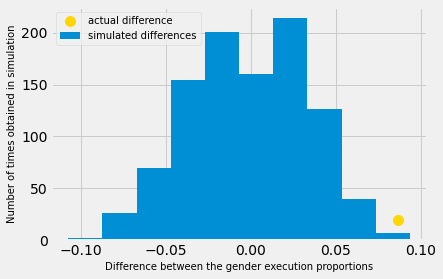

In [56]:
# some of this code from Brexit and ages - Coding for data book

plt.hist(fake_diffs, label = 'simulated differences')
fontsize = {'fontsize': 10}
plt.plot(gender_proportion_diff, 20 , 'o', markersize = 10,color = 'gold', label = 'actual difference')
plt.xlabel('Difference between the gender execution proportions', **fontsize)
plt.ylabel('Number of times obtained in simulation', **fontsize)
plt.legend(**fontsize);

As expected, the distribution is centred around 0 - in a completely unbiased (null) world, no gender differnces in proportions of executions would occur.

In [57]:
same_or_higher = fake_diffs >= gender_proportion_diff
n_same_or_higher = np.count_nonzero(same_or_higher)
n_same_or_higher

In [58]:
proportion = n_same_or_higher / 1000
percentage = proportion * 100
print('proportion = ',proportion, 'percentage = ', percentage)

proportion =  0.002 percentage =  0.2


## Gender conclusion

From this, gender looks to play a factor as to whether the inmate gets executed or not. The chance that the actual difference we found between the male and female executions come about in a random null world is very unlikely, the p value is < 0.01. This means that the result we saw in the actual world only comes by chance less than once every 100 times. It is therefore safe to assume gender is a reason effecting the likelihood of someone getting executed.

# Age and year of sentencing influence on executions

In [59]:
string_executed = deathrow['executed'].astype(str).copy()

In [60]:
np.count_nonzero(string_executed == 'nan')

4

In [61]:
# count and remove NaN values before visualising the data
executed_nan = string_executed == 'nan'
executed_nan_df = string_executed[executed_nan]
executed_nan_df

number
2889    nan
3187    nan
3556    nan
3743    nan
Name: executed, dtype: object

In [62]:
executed_cleaned = string_executed.drop([2889, 3187, 3556, 3743])
sentencing_year_cleaned = deathrow.copy()
sentencing_clean = sentencing_year_cleaned.drop([2889, 3187, 3556, 3743])

Text(0.5, 1.0, 'People executed and not executed per year')

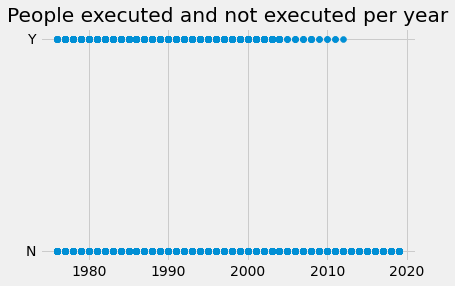

In [63]:
plt.scatter(sentencing_clean['sentencing_year'], executed_cleaned)
plt.title('People executed and not executed per year')

Seems as if executions stopped after around 2012, lets see the number of executions per year

In [64]:
df_sent_year_executions = deathrow.loc[ : ,['sentencing_year', 'executed']].copy()
df_sent_year_executions.head()

,sentencing_year,executed
number,,
0,1976.0,N
1,1976.0,N
2,1976.0,N
3,1977.0,N
4,1977.0,N


In [65]:
cross_tab_sent_exe = pd.crosstab(deathrow['sentencing_year'], deathrow['executed'], normalize='index')
cross_tab_sent_exe.head()

executed,N,Y
sentencing_year,,
1976.0,0.773585,0.226415
1977.0,0.772358,0.227642
1978.0,0.724138,0.275862
1979.0,0.746575,0.253425
1980.0,0.722892,0.277108


In [66]:
# get only the proportions executed from the crosstab above
prop_exc_per_year_series = cross_tab_sent_exe['Y']
years = np.arange(1976 ,2020)
years_series = pd.Series(years)

Text(0.5, 1.1, 'Proportion of inmates on death row executed per year')

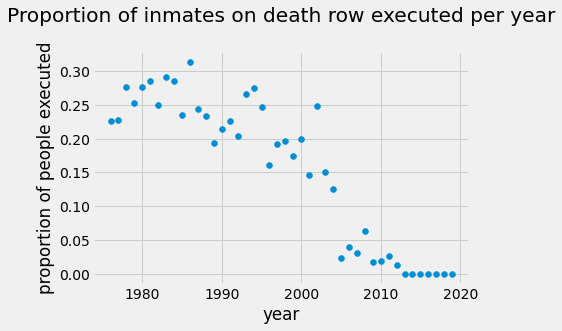

In [67]:
plt.scatter(years_series, prop_exc_per_year_series)
plt.xlabel('year')
plt.ylabel('proportion of people executed')
plt.title('Proportion of inmates on death row executed per year', y=1.1)

## Conclusion -> year of sentencing

Looks as if the criteria for executions got stricter from around 2000.
Possible reasons for this decline in executions is that 'murders and non-negligent manslaughters' nearly halved from 1991 to 2010, giving less opportunity for the death penalty. Additionally, in the last few decades better representation has been given to people facing the capital punishemnt and people who are 'well represented at trial do not get the death penalty' (Millhiser, 2020,https://www.vox.com/2020/12/30/22187578/death-penalty-united-states-executions-decline-gregg-georgia-bucklew-precythe).

However, because people remain on death row for many years before getting executed, the last decade or so of people to be given capital punishment have not been executed yet and it remains to be seen if they will. Therefore, these results may change over the next decade as  decisions on people recently sentenced are made.

## Effects of age

Lets now investigate if age at sentencing has a relationship with executions

In [68]:
with_dob_year = deathrow.copy()
with_dob_year['year born'] = pd.DatetimeIndex(with_dob_year['DOB']).year
year_born_executed_df = with_dob_year.loc[ : ,['executed', 'year born', 'sentencing_year']]
year_born_executed_df['year born'].value_counts(ascending=True)

2061.0    1  
2045.0    1  
2042.0    1  
1998.0    1  
1915.0    1  
         ..  
1961.0    215
1958.0    235
1962.0    236
1959.0    239
1960.0    247
Name: year born, Length: 101, dtype: int64

In [69]:
born_after_2000 = year_born_executed_df['year born'] > 2000
year_born_executed_df[born_after_2000].head()

,executed,year born,sentencing_year
number,,,
578,N,2060.0,2018.0
579,N,2060.0,2018.0
760,N,2059.0,1994.0
1440,N,2014.0,1997.0
1995,N,2051.0,1979.0


Clearly, the rows where the 'year born' is after the sentencing_year and / or after the current year are errors and need to be removed

In [70]:
# get rid of everyone born after 2000
cleaned_year_exc_df = year_born_executed_df.drop([578, 579, 760, 1440, 1995, 2133, 2206, 2617, 3342, 3389, 3754, 5029, 5139, 5250, 5825,
    5856, 6441, 6632, 6677, 6700, 7028, 7059, 7068, 7070, 7331, 7334])
no_na_year_exc = cleaned_year_exc_df.dropna()

We now add the column age at sentencing to the data frame.

In [71]:
no_na_year_exc['age_at_sentencing'] = no_na_year_exc['sentencing_year'] - no_na_year_exc['year born']
no_na_year_exc.head()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,executed,year born,sentencing_year,age_at_sentencing
number,,,,
0,N,1952.0,1976.0,24.0
1,N,1949.0,1976.0,27.0
3,N,1943.0,1977.0,34.0
4,N,1951.0,1977.0,26.0
6,N,1958.0,1977.0,19.0


According to wikipedia, juveniles under the age of 16 can not be sentenced to the death penalty. https://en.wikipedia.org/wiki/Capital_punishment_for_juveniles_in_the_United_States

In [72]:
too_young = no_na_year_exc['age_at_sentencing'] < 16
no_na_year_exc[too_young]

,executed,year born,sentencing_year,age_at_sentencing
number,,,,
494,Y,1995.0,1985.0,-10.0
1103,N,1971.0,1986.0,15.0
2428,N,1982.0,1992.0,10.0
3222,N,1997.0,1995.0,-2.0
3610,Y,1984.0,1987.0,3.0
4621,N,1992.0,1992.0,0.0
4695,N,1992.0,1997.0,5.0
4866,Y,1973.0,1983.0,10.0
5628,Y,1964.0,1979.0,15.0


We now remove people who's age at sentencing is too young to be possible and therefore we will remove these rows.

In [73]:
with_age = no_na_year_exc.drop([494, 1103, 2428, 3222, 3610, 4621, 4695, 4866, 5628, 6011, 6141])
print(len(with_age))
with_age.head()

6477


,executed,year born,sentencing_year,age_at_sentencing
number,,,,
0,N,1952.0,1976.0,24.0
1,N,1949.0,1976.0,27.0
3,N,1943.0,1977.0,34.0
4,N,1951.0,1977.0,26.0
6,N,1958.0,1977.0,19.0


In [74]:
counts_of_age = with_age['age_at_sentencing'].value_counts()
counts_of_age.head()

24.0    352
21.0    327
26.0    310
23.0    310
27.0    305
Name: age_at_sentencing, dtype: int64

In [75]:
# seeing the proportion of people executed per age 
cross_exc_age = pd.crosstab(with_age['age_at_sentencing'], with_age['executed'], normalize='index')
cross_exc_age_indexed = cross_exc_age.reset_index()
cross_exc_age_indexed.head()

executed,age_at_sentencing,N,Y
0,16.0,0.900000,0.100000
1,17.0,0.842105,0.157895
2,18.0,0.796296,0.203704
3,19.0,0.764368,0.235632
4,20.0,0.728000,0.272000


Text(0.5, 1.1, 'proportion of inmates executed by age')

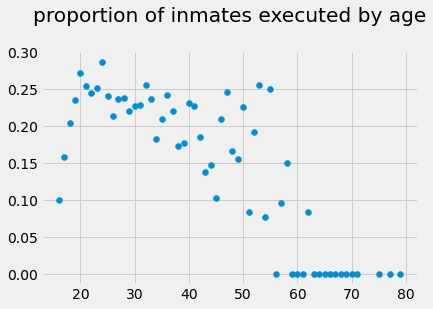

In [76]:
# visualising the data 
p_exc_by_age = cross_exc_age_indexed['Y']
plt.scatter(cross_exc_age_indexed['age_at_sentencing'], p_exc_by_age)
plt.title('proportion of inmates executed by age', y = 1.1)

### Conclusion -> age and executions

Looks as if the courts are more leniant in letting people off from executions as they enter their 50s and beyond. Perhaps this is because they will be likely to die soon anyway, and the process and public backlash of executions are not worth it if they are soon going to die?

Lets investigate this further looking into if this occurance in our data could have come about by chance

In [77]:
# getting only those executed and their demograohics useful to this analysis
age_exc_boolean = with_age['executed'] == 'Y'
with_age_only_y_exc = with_age[age_exc_boolean]
with_age_only_y_exc.head()

,executed,year born,sentencing_year,age_at_sentencing
number,,,,
7,Y,1950.0,1977.0,27.0
8,Y,1954.0,1977.0,23.0
10,Y,1958.0,1977.0,19.0
12,Y,1947.0,1977.0,30.0
17,Y,1930.0,1977.0,47.0


In [78]:
average_sentencing_age = np.mean(with_age['age_at_sentencing'])
average_execution_age = np.mean(with_age_only_y_exc['age_at_sentencing'])
print('average_sentencing_age', average_sentencing_age, ' :  average_execution_age', average_execution_age)

average_sentencing_age 31.322680253203643  :  average_execution_age 29.89693593314763


In [79]:
# sorting inmates into separate younger and older 
young = with_age['age_at_sentencing'] < 50
old = with_age['age_at_sentencing'] >= 50
young_df = with_age[young]
old_df = with_age[old]

In [80]:
young_prop_exc = np.count_nonzero(young_df['executed'] == 'Y') / len(young_df['executed'])
old_prop_exc = np.count_nonzero(old_df['executed'] == 'Y') / len(old_df['executed'])
print('proportion of young people executed', young_prop_exc, ' :  proportion of older people executed', old_prop_exc)

proportion of young people executed 0.22705078125  :  proportion of older people executed 0.12312312312312312


In [81]:
actual_age_proportion_difference = young_prop_exc - old_prop_exc
actual_age_proportion_difference

0.10392765812687688

An 10% differnce in proportions between executions of people under and over 50 may reveal that age plays a factor in the execution process - for fun lets do a permutation test to see the likelihood of getting a 10% difference in a completely unbiased (null) world, using the same logic as for the gender permutation test above.

First we get every age into 1 series and shuffle them, so each prisoner has an equal chance of getting assigned any age.

In [82]:
shuffled_ages = np.random.permutation(with_age['age_at_sentencing'])
shuffled_ages

array([39., 28., 16., ..., 24., 23., 25.])

In [83]:
fake_age_df = pd.DataFrame()
fake_age_df['executed'] = with_age['executed'].copy()
fake_age_df['age_at_sentencing'] = shuffled_ages
fake_age_df.head()

,executed,age_at_sentencing
number,,
0,N,39.0
1,N,28.0
3,N,16.0
4,N,33.0
6,N,36.0


We now simulate 1 trial in the fake world we have created to see the difference in execution proportions for under vs over 50s

In [84]:
fake_young = fake_age_df['age_at_sentencing'] < 50
fake_old = fake_age_df['age_at_sentencing'] >= 50
fake_young_df = fake_age_df[fake_young]
fake_old_df = fake_age_df[fake_old]
fake_young_prop_exc = np.count_nonzero(fake_young_df['executed'] == 'Y') / len(fake_young_df['executed'])
fake_old_prop_exc = np.count_nonzero(fake_old_df['executed'] == 'Y') / len(fake_old_df['executed'])
print('proportion of young people executed', fake_young_prop_exc, ' :  proportion of older people executed', fake_old_prop_exc)
fake_age_proportion_difference = fake_young_prop_exc - fake_old_prop_exc
fake_age_proportion_difference

proportion of young people executed 0.22135416666666666  :  proportion of older people executed 0.22822822822822822


-0.006874061561561562

This difference seems more like you would expect in a completely chance world

Lets simulate this 1000 times to get a better picture and let the magic of probabilities do its thing

In [85]:
fake_age_diffs = np.zeros(1000)
for i in np.arange(1000):
    shuffled_ages = np.random.permutation(with_age['age_at_sentencing'])
    fake_age_df = pd.DataFrame()
    fake_age_df['executed'] = with_age['executed'].copy()
    fake_age_df['age_at_sentencing'] = shuffled_ages
    fake_young = fake_age_df['age_at_sentencing'] < 50
    fake_old = fake_age_df['age_at_sentencing'] >= 50
    fake_young_df = fake_age_df[fake_young]
    fake_old_df = fake_age_df[fake_old]
    fake_young_prop_exc = np.count_nonzero(fake_young_df['executed'] == 'Y') / len(fake_young_df['executed'])
    fake_old_prop_exc = np.count_nonzero(fake_old_df['executed'] == 'Y') / len(fake_old_df['executed'])
    fake_age_proportion_difference = fake_young_prop_exc - fake_old_prop_exc
    fake_age_diffs[i] = fake_age_proportion_difference

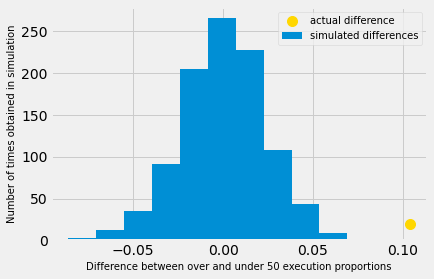

In [86]:
# some of this code from Brexit and ages - Coding for data book

plt.hist(fake_age_diffs, label = 'simulated differences')
fontsize = {'fontsize': 10}
plt.plot(actual_age_proportion_difference, 20 , 'o', markersize = 10,color = 'gold', label = 'actual difference')
plt.xlabel('Difference between over and under 50 execution proportions', **fontsize)
plt.ylabel('Number of times obtained in simulation', **fontsize)
plt.legend(**fontsize);

In [87]:
same_prop_or_higher = fake_age_diffs >= actual_age_proportion_difference
n_same_prop_or_higher = np.count_nonzero(same_prop_or_higher)
n_same_prop_or_higher

0

In [88]:
proportion_age = n_same_prop_or_higher / 1000
percentage_age = proportion_age * 100
print('proportion = ',proportion_age, 'percentage = ', percentage_age)

proportion =  0.0 percentage =  0.0


### Conclusion -> younger vs older

As expected, in a random, null world, the proportion differnce between over and under 50s is centred around 0 in a normal distribution.
This makes it very unlikely that the over 10% differnce we observed in our data came about due to chance.

A possible explanation for over 50s being less likely to get executed is that some lawyers argue a case that it is cruel to execute a fragile, ill, elderly person. More information about this can be found at https://apnews.com/article/d4d2040cceed48529d17cc33438a72cd

This interesting gap may result in age being able to be used as a predictor of execution likelihood. Suppose a 50 year old was sentenced to death, they and their family may be interested to know what the chances were of them actually being executed for various reasons with an obvious one being it is nice to know if you are likely going to die.

We are interested here in age and execution. We already have a dataframe with this information above, 'with_age' 

In [89]:
only_age_exc = with_age.loc[ : ,['executed', 'age_at_sentencing']].copy()
only_age_exc.head()

,executed,age_at_sentencing
number,,
0,N,24.0
1,N,27.0
3,N,34.0
4,N,26.0
6,N,19.0


In [90]:
# Replace 'N' and 'Y' with dummy variables 1 and 0
only_age_exc['executed_dummy'] = only_age_exc['executed'].replace(
    ['N', 'Y'],
    [0, 1])
only_age_exc.head()

,executed,age_at_sentencing,executed_dummy
number,,,
0,N,24.0,0
1,N,27.0,0
3,N,34.0,0
4,N,26.0,0
6,N,19.0,0


In [91]:
age_at_sentencing = only_age_exc['age_at_sentencing']
executed_dummy = only_age_exc['executed_dummy']

In [92]:
only_age_exc['executed'].value_counts()

N    5041
Y    1436
Name: executed, dtype: int64

This scatter looks like older people are less likely to have a dummy value of 1 (executed), but we have already found this in the permutation test above showing that older people are less likely to be executed - but now we ask how less likely and can we predict the likelihood with a logistic regression

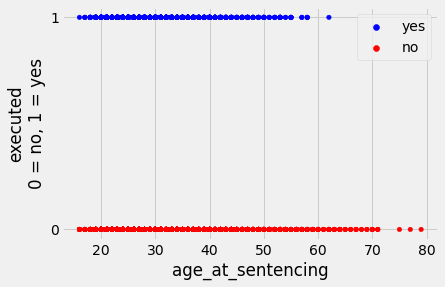

In [93]:
def plot_age_exc():
    # Build plot, add custom labels.
    colors = only_age_exc['executed'].replace(['N', 'Y'], ['red', 'blue'])
    only_age_exc.plot.scatter('age_at_sentencing', 'executed_dummy', c=colors)
    plt.ylabel('executed\n0 = no, 1 = yes')
    plt.yticks([0,1]);  # Just label 0 and 1 on the y axis.
    # Put a custom legend on the plot.  This code is a little obscure.
    plt.scatter([], [], c='blue', label='yes')
    plt.scatter([], [], c='red', label='no')

# Do the plot
plot_age_exc()
# Show the legend
plt.legend();

First, lets see if a Linear regression is suitable

In [94]:
from scipy.optimize import minimize
def ss_any_line(c_s, x_values, y_values):
    intercept, slope = c_s
    predicted = intercept + x_values * slope
    error = y_values - predicted
    return np.sum(error ** 2)
min_regression = minimize(ss_any_line, [-1, 0.1], args=(age_at_sentencing, executed_dummy))
regress_int, regress_slope = min_regression.x
print('Best linear regression intercept', regress_int)
print('Best linear regression slope', regress_slope)

Best linear regression intercept 0.33237562669795584
Best linear regression slope -0.0035331595269444543


In [95]:
predicted_executed_dummy = regress_int + regress_slope * age_at_sentencing
predicted_executed_dummy.head()

number
0    0.247580
1    0.236980
3    0.212248
4    0.240513
6    0.265246
Name: age_at_sentencing, dtype: float64

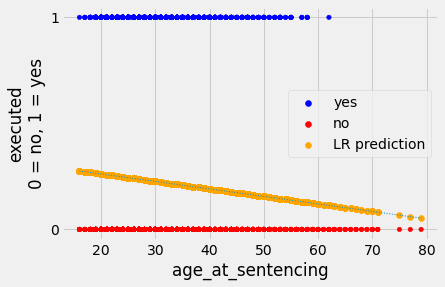

In [96]:
plot_age_exc()

# A new plot on top of the old.
plt.scatter(age_at_sentencing, predicted_executed_dummy,
            label='LR prediction',
            color='orange')
# Another plot, to show the underlying line
fine_x = np.linspace(np.min(age_at_sentencing), np.max(age_at_sentencing), 1000)
fine_y = regress_int + regress_slope * fine_x
plt.plot(fine_x, fine_y, linewidth=1, linestyle=':')
# Show the legend.
plt.legend();

This does look like it could be suitable, but for the sake of completeness, lets see how it compares to a sigmoidal curve

### Lets use statsmodels to see how a sigmoidal curve will look commpared to the linear regression

In [97]:
# make funnctions to get sigmoid probabilities from a log straight line (reverse logit transformation) and to get the reverse logit transformation from an intercept and slope

def inv_logit(y):
    """ Reverse logit transformation
    """
    odds_ratios = np.exp(y)  # Reverse the log operation.
    return odds_ratios / (odds_ratios + 1)  # Reverse odds ratios operation.


def params2pps(intercept, slope, x):
    """ Calculate predicted probabilities of 1 for each observation.
    """
    # Predicted log odds of being in class 1.
    predicted_log_odds = intercept + slope * x
    return inv_logit(predicted_log_odds)


# Some plausible values for intercept and slope.
nice_intercept, nice_slope = -7, 0.8
predictions_new = params2pps(nice_intercept, nice_slope, age_at_sentencing)

In [214]:
# instal statsmodels python package to allow us to do statistical tests
!pip install statsmodels
import statsmodels.formula.api as smf
stats_mod = smf.logit('executed_dummy ~ age_at_sentencing', data = only_age_exc)
fitted_stats_mod = stats_mod.fit()
fitted_stats_mod.summary()

Optimization terminated successfully.
         Current function value: 0.525683
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         executed_dummy   No. Observations:                 6477
Model:                          Logit   Df Residuals:                     6475
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 May 2021   Pseudo R-squ.:                0.006385
Time:                        18:32:53   Log-Likelihood:                -3404.8
converged:                       True   LL-Null:                       -3426.7
Covariance Type:            nonrobust   LLR p-value:                 3.717e-11
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.5818      0.107     -5.435      0.000      -0.792      -0.372
age_at_sentencing    -0.0219      0.003     -6.445      0.000      -0.029      -0.015
=====================================================================================
"""

In [215]:
# predicted probabilities of execution
statmod_predict = fitted_stats_mod.predict(only_age_exc['age_at_sentencing'])
statmod_predict.head()

number
0    0.248379
1    0.236320
3    0.209783
4    0.240294
6    0.269375
dtype: float64

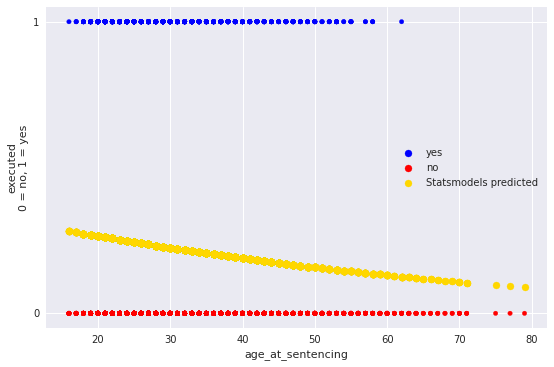

In [216]:
plot_age_exc()
plt.scatter(age_at_sentencing, statmod_predict,
            label = 'Statsmodels predicted', color = 'gold')
plt.legend();

It looks very similar to the linear regression model, but is curved slightly

Lets generate an odds-ratio prediction to see how increasing age effects the odds of execution. An odds-ratio of 1 would mean for every 1 execution, you can expect 1 non execution (a 50% chance). Likewise, an odds ratio of 2 would mean an execution is double as likely to occur compared to no execution (66.6% chance to 33.3% chance)

In [101]:
nice_intercept, nice_slope = 0.3, -0.8
predictions_new = params2pps(nice_intercept, nice_slope, age_at_sentencing)
fine_x = np.linspace(np.min(age_at_sentencing), np.max(age_at_sentencing), 1000)
fine_y_sigmoid = params2pps(nice_intercept, nice_slope, fine_x)

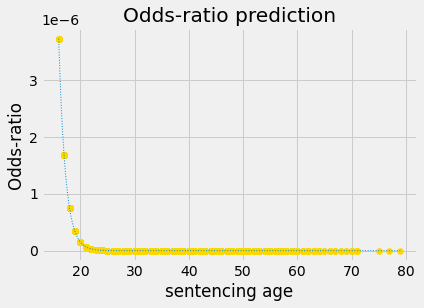

In [102]:
predictions_or = predictions_new / (1 - predictions_new)
plt.scatter(age_at_sentencing, predictions_or, color='gold')
fine_y_or = fine_y_sigmoid / (1 - fine_y_sigmoid)
plt.plot(fine_x, fine_y_or, linewidth=1, linestyle=':')
plt.title('Odds-ratio prediction')
plt.xlabel('sentencing age')
plt.ylabel('Odds-ratio');

This exponential graph changes from very high odds at younger ages to near 0 for older ages

We can then get our straight line logarithmic prediction

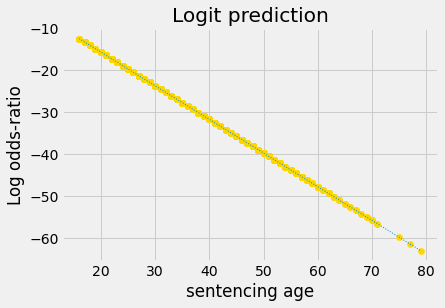

In [103]:
predictions_or_log = np.log(predictions_or)
plt.scatter(age_at_sentencing, predictions_or_log, color='gold')
fine_y_or_log = np.log(fine_y_or)
plt.plot(fine_x, fine_y_or_log, linewidth=1, linestyle=':')
plt.title('Logit prediction')
plt.xlabel('sentencing age')
plt.ylabel('Log odds-ratio');

We can see again, the odds of execution decrease with age

Going back to our 50 year old sentenced to death, we can now give them their likelihood of actually getting executed to give some peace of mind to them and their loved ones 

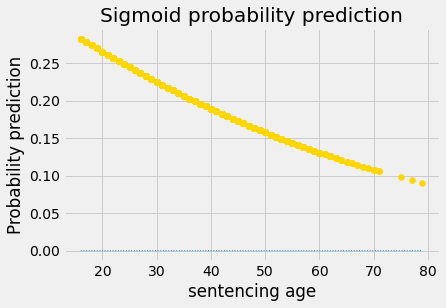

In [104]:
plt.scatter(age_at_sentencing, statmod_predict, color='gold')
plt.plot(fine_x, fine_y_sigmoid, linewidth=1, linestyle=':')
plt.title('Sigmoid probability prediction')
plt.xlabel('sentencing age')
plt.ylabel('Probability prediction');

In [105]:
# likelihood of 20 year old being executed
twenty = only_age_exc['age_at_sentencing'] == 20
twenty_df = only_age_exc[twenty]
twenty_df.iloc[0]

executed             Y   
age_at_sentencing    20.0
executed_dummy       1   
Name: 19, dtype: object

In [106]:
likelihood_exc_20 = statmod_predict[19]
print('likelihood of execution at age 20:', likelihood_exc_20, '  ,likelihood of survival at age: 20', 1 - likelihood_exc_20)

likelihood of execution at age 20: 0.26508768315207604   ,likelihood of survival at age: 20 0.7349123168479239


In [107]:
fifty = only_age_exc['age_at_sentencing'] == 50
fifty_df = only_age_exc[fifty]
fifty_df.iloc[0]

executed             N   
age_at_sentencing    50.0
executed_dummy       0   
Name: 348, dtype: object

In [108]:
likelihood_exc_50 = statmod_predict[348]
print('likelihood of execution at age 50:', likelihood_exc_50, '  ,likelihood of survival at age: 50', 1 - likelihood_exc_50)

likelihood of execution at age 50: 0.15755063312279172   ,likelihood of survival at age: 50 0.8424493668772083


In [109]:
seventy = only_age_exc['age_at_sentencing'] == 70
seventy_df = only_age_exc[seventy]
seventy_df.iloc[0]

executed             N   
age_at_sentencing    70.0
executed_dummy       0   
Name: 2857, dtype: object

In [110]:
likelihood_exc_70 = statmod_predict[2857]
print('likelihood of execution at age 70:', likelihood_exc_70, '  ,likelihood of survival at age: 70', 1 - likelihood_exc_70)

likelihood of execution at age 70: 0.10769699392982997   ,likelihood of survival at age: 70 0.89230300607017


### Conclusion -> predicting execution probability from age at sentencing

The statsmodel sigmoid predictions show the predicted probability of getting a 1 label (executed)

As the prediction curve shows,a 20 year old on death row can expect to have around a 27% chance of dying by execution, whereas a 70 year old could comfort their family by explaining that there is only around a 90% chance the execution does not go ahead

# Race and gender by age group

In this section we are going to further the discoveries we have made about the inconsitent treatment of death row trials between different ages. Kruttschnitt & McCarthy, (1985) concluded that the most potent evidence for gender bias within the judicial system is the extent to which previous convictions and prior criminal history will affect the outcome of serious future trial. When a female is being incarcerated, criminal history provided no significant effect on outcome, whereas the criminal hisotry of males was a effective predictor of trial outcome. This has lead us to first use gender as a variable to see if there are differences in the proportions of males and females on death row in different age groups, because considering previous research, criminal history only affects males and so as age increases the proportion of males should increase over females as criminal history increases. 

## Gender and age

here we make a dataframe with gender and age 

In [111]:
age_gender_investingation = deathrow.copy()
age_gender_1 = year_born_executed_df.copy()
gender_series = age_gender_investingation['gender']
age_gender_1['gender'] = gender_series
age_gender_2 = age_gender_1.dropna()
# remove people who are too young to be executed / born after sentencing year
age_gender_3 = age_gender_2.drop([578, 579, 760, 1440, 1995, 2133, 2206, 2617, 3342, 3389, 3754, 5029, 5139, 5250, 5825,
    5856, 6441, 6632, 6677, 6700, 7028, 7059, 7068, 7070, 7331, 7334, 494, 1103, 2428, 3222, 3610, 4621, 4695, 4866, 5628, 6011, 6141])
age_gender_3['age at sentencing'] = age_gender_3['sentencing_year'] - age_gender_3['year born']
gender_age = age_gender_3.copy()
gender_age

,executed,year born,sentencing_year,gender,age at sentencing
number,,,,,
0,N,1952.0,1976.0,Male,24.0
1,N,1949.0,1976.0,Male,27.0
3,N,1943.0,1977.0,Male,34.0
4,N,1951.0,1977.0,Male,26.0
6,N,1958.0,1977.0,Male,19.0
...,...,...,...,...,...
7328,Y,1982.0,2008.0,Male,26.0
7329,N,1965.0,2011.0,Male,46.0
7330,Y,1970.0,2011.0,Male,41.0


In [112]:
gender_age_inv = gender_age.copy() 

lets group the ages in to 10 year categories and find the ratio of male to female in each

In [113]:
age_category = pd.cut(gender_age['age at sentencing'], bins=[0, 20, 30, 40, 50, 60, 70, np.inf])
print (pd.crosstab(age_category, gender_age_inv['gender'], normalize='index'))
print (pd.crosstab(age_category, gender_age_inv['gender']))

gender               Female      Male
age at sentencing                    
(0.0, 20.0]        0.011834  0.988166
(20.0, 30.0]       0.015712  0.984288
(30.0, 40.0]       0.016613  0.983387
(40.0, 50.0]       0.039683  0.960317
(50.0, 60.0]       0.020921  0.979079
(60.0, 70.0]       0.062500  0.937500
(70.0, inf]        0.000000  1.000000
gender             Female  Male
age at sentencing              
(0.0, 20.0]        6       501 
(20.0, 30.0]       48      3007
(30.0, 40.0]       31      1835
(40.0, 50.0]       30      726 
(50.0, 60.0]       5       234 
(60.0, 70.0]       3       45  
(70.0, inf]        0       6   


<AxesSubplot:xlabel='age at sentencing'>

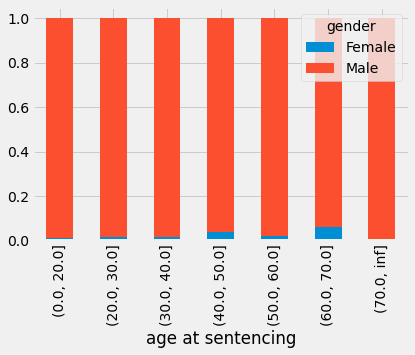

In [114]:
(pd.crosstab(age_category, gender_age_inv['gender'], normalize='index')).plot(kind='bar', stacked = True)

In [115]:
is_male = gender_age_inv['gender'] == 'Male'
is_female = gender_age_inv['gender'] == 'Female'

the_males = gender_age_inv[is_male]
the_females = gender_age_inv[is_female]

male_ages_sorted = the_males.sort_values('age at sentencing')
age_m = male_ages_sorted['age at sentencing']

female_ages_sorted = the_females.sort_values('age at sentencing')
age_f = female_ages_sorted['age at sentencing']


list_ages  = list(range(17, 71))


In [116]:
# delete ages not in dataframe
del list_ages[52]
del list_ages[51]
del list_ages[50]
del list_ages[49]
del list_ages[48]
del list_ages[47]
del list_ages[44]
del list_ages[43]
del list_ages[42]
del list_ages[41]
del list_ages[38]
del list_ages[37]
del list_ages[36]
del list_ages[34]


In [117]:
age_counts_m = male_ages_sorted['age at sentencing'].value_counts()
age_counts_f = female_ages_sorted['age at sentencing'].value_counts()
added_age_counts = age_counts_m + age_counts_f
age_counts_m_p = (age_counts_m / added_age_counts).dropna()
age_counts_f_p = (age_counts_f / added_age_counts).dropna()

Text(0.5, 1.0, 'Proportion of females compared to males by age')

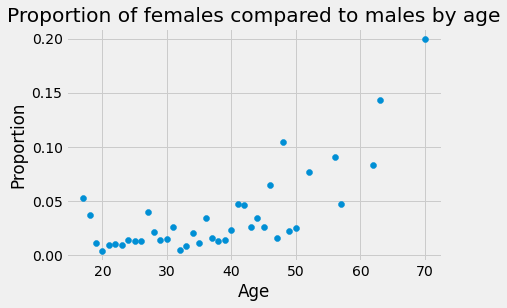

In [118]:
plt.scatter(list_ages, age_counts_f_p)
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Proportion of females compared to males by age')

There appears to be a moderate positive correlation between age and proportion of females, lets run a pearson's R to quantify it. 

In [119]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.mean(x))/np.std(x)

In [120]:
R_value_gender= np.mean(standard_units(list_ages) * standard_units(age_counts_f_p))
R_value_gender

0.7137573565019794

In [121]:
#some numbers to help us with the conclusion below
Females = np.sum(age_counts_f)
Males = np.sum(age_counts_m)
print (Males)
print(Females)

6354
123


### Conclusion -> Gender and age 

As we can see the proportion of females that are sentenced increases with age group with a positive correlaiton of 0.71 which is strong

This being said the population of females is incredibly small compared to males with a sample size of just 123 vs 6354 males meaning any conclusions must be treated with caution.

This is the opposite outcome to our prediction and below are some potential reasons to why the amount of females increases with age

- Young women more likely to be perceived as being able to reform
- Criminal pressure less on young women (e.g. gang culture) so as age increases, criminal pressure reduces and the ratio tends to normal 

## Race and age

The database of evidence proving racial bias in the american judicial system is vastly extensive. Some statistical examples of how shocking this institutionalised racism is are listed below. 

- 75 percent of the cases for murder executions involve the murder of white victims, even though blacks and whites are about equally likely to be victims of murder. https://deathpenaltyinfo.org/policy-issues/race
- There are more African Americans in prison than in college (Mallory, 2015)
- An innocent Black person is seven times more likely to be convicted for murder as compared to an innocent white person (Gross, Possley and Stephens, 2017).

It would be interesting to investigate how racial bias varies with age. Is an older person on death row more likely to be black or white? If we find such a predictor then this will be an exciting novel example of how flawed the death penalty is and how blantant instituitionalised racism is within the US. 

We start by making a dataframe containing age and race 

In [122]:
race_age_invest = deathrow.copy()
age_race_1 = year_born_executed_df.copy()
race_series = race_age_invest['race']
age_race_1['race'] = race_series
age_race_2 = age_race_1.dropna()
# remove people who are too young to be executed / born after sentencing year
age_race_3 = age_race_2.drop([578, 579, 760, 1440, 1995, 2133, 2206, 2617, 3342, 3389, 3754, 5029, 5139, 5250, 5825,
    5856, 6441, 6632, 6677, 6700, 7028, 7059, 7068, 7070, 7331, 7334, 494, 1103, 2428, 3222, 3610, 4621, 4695, 4866, 5628, 6011, 6141])
age_race_3['age at sentencing'] = age_race_3['sentencing_year'] - age_gender_3['year born']
race_age = age_race_3.copy()
race_age

,executed,year born,sentencing_year,race,age at sentencing
number,,,,,
0,N,1952.0,1976.0,Black,24.0
1,N,1949.0,1976.0,White,27.0
3,N,1943.0,1977.0,Black,34.0
4,N,1951.0,1977.0,Black,26.0
6,N,1958.0,1977.0,Black,19.0
...,...,...,...,...,...
7328,Y,1982.0,2008.0,White,26.0
7329,N,1965.0,2011.0,White,46.0
7330,Y,1970.0,2011.0,White,41.0


Now we create age groups using bins of a 10 year age gap exceot 0-20 because the minimum sentencing age is 16.
We then crosstab age and race to get proportions of races at each age category.

In [123]:
group_age = pd.cut(race_age['age at sentencing'], bins=[0, 20, 30, 40, 50, 60, 70, np.inf])

print (pd.crosstab(group_age, race_age['race'], normalize='index'))
print (pd.crosstab(group_age, race_age['race']))


race                  Asian     Black  Hispanic or Latino  Native American  \
age at sentencing                                                            
(0.0, 20.0]        0.003945  0.524655  0.116371            0.013807          
(20.0, 30.0]       0.009820  0.451718  0.080851            0.012111          
(30.0, 40.0]       0.008039  0.363344  0.077170            0.011254          
(40.0, 50.0]       0.007937  0.279101  0.063492            0.011905          
(50.0, 60.0]       0.008368  0.213389  0.046025            0.020921          
(60.0, 70.0]       0.020833  0.250000  0.000000            0.020833          
(70.0, inf]        0.000000  0.166667  0.000000            0.000000          

race               Other or Unknown     White  
age at sentencing                              
(0.0, 20.0]        0.001972          0.339250  
(20.0, 30.0]       0.003273          0.442226  
(30.0, 40.0]       0.003751          0.536442  
(40.0, 50.0]       0.007937          0.629630  
(50.0, 60

This is hard to read so we visualise it as a stacked bar graph. 

Text(0.5, 1.0, 'Proportions of race at each age group')

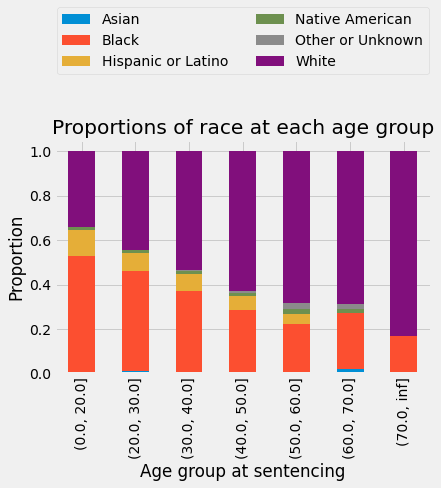

In [124]:
pd.crosstab(group_age, race_age['race'], normalize='index').plot(kind='bar', stacked = True)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.6), ncol=2)
plt.xlabel('Age group at sentencing')
plt.ylabel('Proportion')
plt.title('Proportions of race at each age group')

lets do the same but with just black and white people because there appears to be a linear relationship whereby as age increases, the proportion of white to black people increases. The other race categories also have far smaller sample sizes so any conclusions made about these groups would be less reliable.

In [125]:
def classify_race(row):
    if row.loc['race'] == 'Black':
        return True
    if row.loc['race'] == 'White':
        return True
    else:
        return False

Text(0, 0.5, 'Proportion')

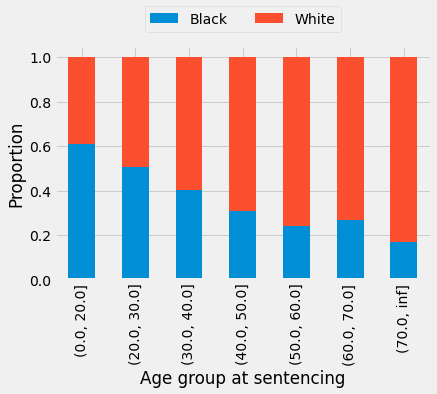

In [126]:
black_or_white = race_age.apply(classify_race, axis='columns')
whites_and_blacks = race_age[black_or_white]
wb_age_groups = pd.cut(whites_and_blacks['age at sentencing'], bins=[0, 20, 30, 40, 50, 60, 70, np.inf])

pd.crosstab(wb_age_groups, whites_and_blacks['race'], normalize='index').plot(kind='bar', stacked = True)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=2)
plt.xlabel('Age group at sentencing')
plt.ylabel('Proportion')

There appears to be an interesting linear correlation whereby there are relatively more black people in the lower age groups and relatively more white people
in the older age groups. 

The next step is to investigate this correlation, first we need to seperate white and black people to allow visualisation of the correlations. 

In [127]:
is_black = race_age['race'] == 'Black'
is_white = race_age['race'] == 'White'
the_whites = race_age[is_white]
the_blacks = race_age[is_black]

In [128]:
blacks_age_sorted = the_blacks.sort_values('age at sentencing')
age = blacks_age_sorted['age at sentencing']

whites_age_sorted = the_whites.sort_values('age at sentencing')
age_w = whites_age_sorted['age at sentencing']

list_blacks = list(range(0, 72))
#delete the ages that had no sentencing 
del list_blacks[61]
del list_blacks[64]
del list_blacks[0:16]
del list_blacks[49 : 52]
ages_black = list_blacks


ages_whites = ages_black.copy()

In [129]:
age_counts_b = blacks_age_sorted['age at sentencing'].value_counts()
age_counts_w = whites_age_sorted['age at sentencing'].value_counts()
added_age_counts = age_counts_b + age_counts_w
age_counts_b_p = (age_counts_b / added_age_counts).dropna()
age_counts_w_p = (age_counts_w / added_age_counts).dropna()

Text(0.5, 1.0, 'Proportion of black people compared to white by age')

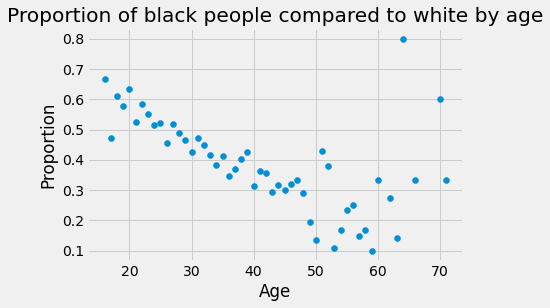

In [130]:

plt.scatter(ages_black, age_counts_b_p)
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Proportion of black people compared to white by age')

Text(0.5, 1.0, 'Proportion of white people compared to black by age')

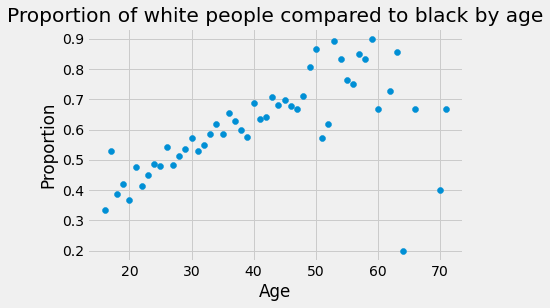

In [131]:
plt.scatter(ages_whites, age_counts_w_p)
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Proportion of white people compared to black by age')

As we can see there is a strong positive correlation between age and proportion of sentenced for white people but a strong negative correlation for age and proportion sentenced for black people.  

Lets take this further by quantifying the correlation. First we can see that both graphs have outliers at the tail end of the graph which is most likely due to the fact that the sample size of the higher age groups is very small (i.e less than 10). Lets remove outliers or both graphs at age 70 and 64. 

In [132]:
del age_counts_w_p[64]
del age_counts_w_p [70]
del age_counts_b_p [64]
del age_counts_b_p [70]
del ages_whites[-4]
del ages_whites[-2]
del ages_black[-4]
del ages_black [-2]

Text(0.5, 1.0, 'Proportion of black people compared to white by age')

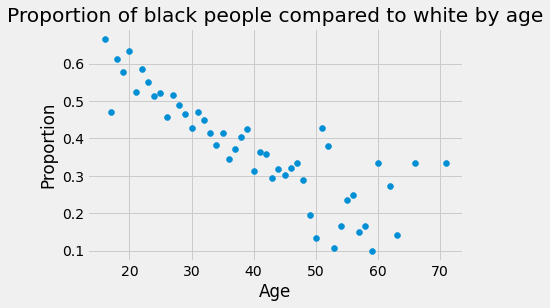

In [133]:
# check that it worked
plt.scatter(ages_black, age_counts_b_p)
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Proportion of black people compared to white by age')

In [134]:
# lets run a Pearson's R

def standard_units(nums):

        return (nums - np.mean(nums))/np.std(nums)



In [135]:
black_r = np.mean(standard_units(ages_black) * standard_units(age_counts_b_p))
black_r

-0.8430998223497875

In [136]:
white_r = np.mean(standard_units(ages_whites) * standard_units(age_counts_w_p))
white_r

0.8430998223497875

Obviously the correlations are the inverse of each other which shows everything has been executed correcly.

.84 is a very strong correlation as predicted

In [137]:
mean_age_sentencing = np.mean(race_age['age at sentencing'])
mean_age_sentencing

31.322680253203643

### Conclusion -> race and age

It appears that the ratio of black to white people changes linearly with as age group increases.

why could this be? below are some hypotheses as to why there are less old black people on deathrow:

- As time goes on, black people are more likely to get a fair trial due to the reduction(but by no means elimination) of institutionalised racism. The mean age at sentencing is 31 meaning that for someone to be older and on deathrow it is likely that they were sentenced a while ago. When, perhaps black people were less likely to receive fair trial. 
- Perhaps life expectancy of black people less in areas where deathrow is a common punishment e.g. texas


Whatever the reason, there is a disproportionate number of young black people being sentenced over and above young white people, further highlighting the deeply flawed practical implementation of the death penalty.

# Does education, finance and child abuse play a role in people on death row?

Let's see if states with highest child abuse victims and death row inmates have the worst education scores and are the poorest

## Lets start with income

Previous literature linking socio-economic status to violent crimes has been mixed with findings both showing socio-economic status can be a predictor of non-accidental injuries (Nixon et.al 1981) as well as Dunaway et.al (2000) found 'social class exerted little direct influence on adult criminality in the general population'. We will therefore add research to help clarify if income (i.e socio economic status) can predict crimes worthy of capital punishment.

We first download a dataset showing revenue, expenditure and academic grades at various ages for each state (from https://www.kaggle.com/noriuk/us-education-datasets-unification-project).

In [138]:
# open the dataset, previously edited in excel by us to kept only the 2015 information, the most recent year with completely filled revenue, expenditure, and grades
state_full_education = pd.read_csv('2015_state_education_revenue.csv')
print(len(state_full_education))
state_full_education.head()


51


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,2015_ALABAMA,ALABAMA,2015,734974,7360222,795238,4080167,2484817,7501799,3817479,...,55808,55792,50668,452764,222182,743789,231,267,217,259
1,2015_ALASKA,ALASKA,2015,130755,2920986,344111,2026555,550320,2968341,1484610,...,10118,9400,9651,80011,38688,132477,236,280,213,260
2,2015_ARIZONA,ARIZONA,2015,944978,8230507,1093834,3232013,3904660,7902600,3846357,...,86594,84084,84854,687144,333579,1109040,238,283,215,263
3,2015_ARKANSAS,ARKANSAS,2015,479682,5308625,581412,4075118,652095,5350543,2620399,...,35893,36882,32385,296050,142242,492132,235,275,218,259
4,2015_CALIFORNIA,CALIFORNIA,2015,6226523,78248042,7556365,42360470,28331207,78365958,38951948,...,485885,465322,492835,3748465,1941009,6226737,232,275,213,259


In [139]:
# columns we are interested in
state_education = state_full_education.loc[ : ,['PRIMARY_KEY', 'STATE', 'TOTAL_REVENUE', 'TOTAL_EXPENDITURE',
    'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']]
state_education.head()

,PRIMARY_KEY,STATE,TOTAL_REVENUE,TOTAL_EXPENDITURE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,2015_ALABAMA,ALABAMA,7360222,7501799,231,267,217,259
1,2015_ALASKA,ALASKA,2920986,2968341,236,280,213,260
2,2015_ARIZONA,ARIZONA,8230507,7902600,238,283,215,263
3,2015_ARKANSAS,ARKANSAS,5308625,5350543,235,275,218,259
4,2015_CALIFORNIA,CALIFORNIA,78248042,78365958,232,275,213,259


In [140]:
#removing rows with states who had no executions in our original deahtrow dataframe
state_education = state_education.drop([1, 6, 7, 8, 11, 13, 15, 19, 20, 21, 22, 23, 29, 30, 31, 32, 34, 39, 45, 47, 48, 49])
state_education.head(10)
              

,PRIMARY_KEY,STATE,TOTAL_REVENUE,TOTAL_EXPENDITURE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,2015_ALABAMA,ALABAMA,7360222,7501799,231,267,217,259
2,2015_ARIZONA,ARIZONA,8230507,7902600,238,283,215,263
3,2015_ARKANSAS,ARKANSAS,5308625,5350543,235,275,218,259
4,2015_CALIFORNIA,CALIFORNIA,78248042,78365958,232,275,213,259
5,2015_COLORADO,COLORADO,9648297,9557682,242,286,224,268
9,2015_FLORIDA,FLORIDA,26971491,27277049,243,275,227,263
10,2015_GEORGIA,GEORGIA,18584666,18501103,236,279,222,262
12,2015_IDAHO,IDAHO,2167967,2029520,239,284,222,269
14,2015_INDIANA,INDIANA,12456571,11378564,248,287,227,268
16,2015_KANSAS,KANSAS,5991731,6175724,241,284,221,267


Lets make a new column for total net income (total revenue - total expenditure)

In [141]:
state_education['TOTAL_NET_INCOME'] = state_education['TOTAL_REVENUE'] - state_education['TOTAL_EXPENDITURE']
# top 10 states with the lowest net income
lowest_net_10 = state_education.sort_values('TOTAL_NET_INCOME', ascending=True).head(10)
lowest_net_10.head()

,PRIMARY_KEY,STATE,TOTAL_REVENUE,TOTAL_EXPENDITURE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,TOTAL_NET_INCOME
33,2015_NORTH_CAROLINA,NORTH_CAROLINA,13146934,14060699,244,281,226,261,-913765
43,2015_TEXAS,TEXAS,55582029,56255791,244,284,218,261,-673762
9,2015_FLORIDA,FLORIDA,26971491,27277049,243,275,227,263,-305558
46,2015_VIRGINIA,VIRGINIA,15857524,16113212,247,288,229,267,-255688
16,2015_KANSAS,KANSAS,5991731,6175724,241,284,221,267,-183993


Text(0.5, 1.0, 'Lowest income per state')

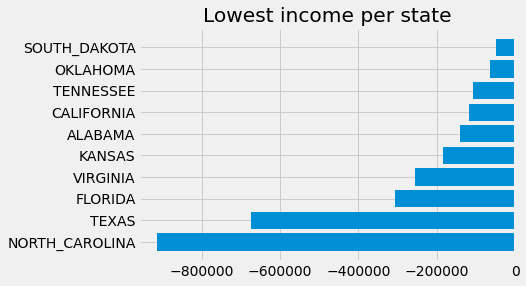

In [142]:
plt.barh(lowest_net_10['STATE'],lowest_net_10['TOTAL_NET_INCOME'])
plt.title('Lowest income per state')

Remember the data frames from earlier with proportion of people on death row per state and proportion executed per state. Texas, California and Florida were the states with the biggest differences

In [143]:
only_state.head()

,state,death_row_per_state,proportion_deathrow_per_state
0,TX,1068,0.145603
1,CA,995,0.135651
2,FL,992,0.135242
3,AL,465,0.063395
4,PA,412,0.056169


In [144]:
prop_exc_df_renamed.head()

,state,proportion_executed
0,TX,0.386050
1,OK,0.078729
2,VA,0.077348
3,MO,0.061464
4,FL,0.060773


In [145]:
top_10_states_deathrow = only_state.head(10)
top_10_states_deathrow.head()

,state,death_row_per_state,proportion_deathrow_per_state
0,TX,1068,0.145603
1,CA,995,0.135651
2,FL,992,0.135242
3,AL,465,0.063395
4,PA,412,0.056169


Text(0.5, 1.0, 'states with highest proportions on death row')

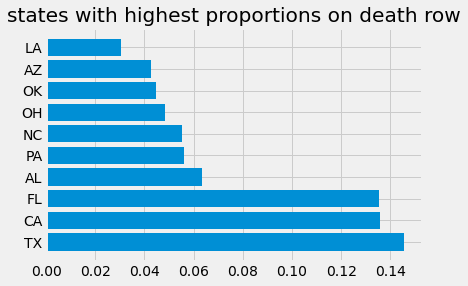

In [146]:
plt.barh(top_10_states_deathrow['state'],top_10_states_deathrow['proportion_deathrow_per_state'])
plt.title('states with highest proportions on death row')

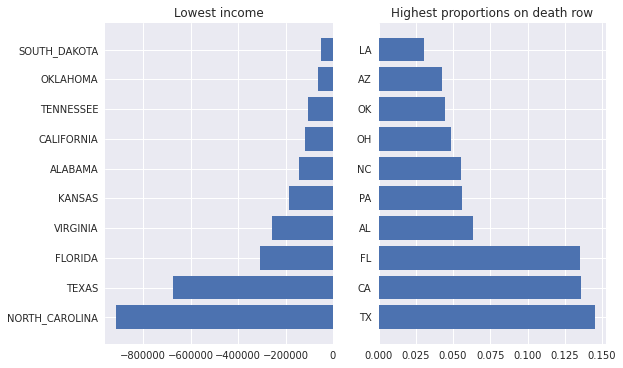

In [147]:
plt.style.use('seaborn')

x1 = lowest_net_10['STATE']
x2 = top_10_states_deathrow['state']
y1 = lowest_net_10['TOTAL_NET_INCOME']
y2 = top_10_states_deathrow['proportion_deathrow_per_state']

plt.subplot(1, 2, 1) 
plt.barh(x1, y1)
plt.title("Lowest income")


plt.subplot(1, 2, 2) 
plt.barh(x2, y2)
plt.title("Highest proportions on death row")


plt.show()

From the side by side bar graphs above we can see that North Carolina, Texas, Florida, Alabama, California and Oklahoma are states in the top 10 lowest income list as well as in the top 10 highest states on death row. This seems to suggest that states with lower income are also more likely to have higher proportions of people on death row.

Notice also how Texas, the state with unproportionally more people executed (38%) than the number of people on deathrow (14%) is the second poorest state, this may suggest that the execution system is classist.


Regarding people on deathrow, this importantly does not take into consideration the population of each state, for example, of the people on death row, the most are from Texas, but Texas is the second most populated (see below) so it would be expected that higher populated states will have more people on death row.

Therefore to properly understand any links, it is better to see the number of people on death row per state compared to that state's population

We will  load a dataset from the 2019 US census that contains the population estimate for each state in 2019 from https://www.kaggle.com/peretzcohen/2019-census-us-population-data-by-state

In [148]:
state_population = pd.read_csv('2019_state_population.csv')
state_pop_df = state_population.loc[ : ,['state','POPESTIMATE2019']].copy()

In [149]:
total_US_pop = np.sum(state_pop_df['POPESTIMATE2019'])
total_US_pop

328239523

In [150]:
clean_state_pop_df = state_pop_df.drop([1, 6, 7, 8, 11, 13, 15, 19, 20, 21, 22, 23, 29, 30, 31, 32,
        34, 39, 45, 47, 48, 49])
clean_state_pop_df.head()

,state,POPESTIMATE2019
0,AL,4903185
2,AZ,7278717
3,AR,3017804
4,CA,39512223
5,CO,5758736


In [151]:
state_population_wanted_cols = clean_state_pop_df.loc[ : ,['state', 'POPESTIMATE2019']]
state_population_wanted_cols

,state,POPESTIMATE2019
0,AL,4903185
2,AZ,7278717
3,AR,3017804
4,CA,39512223
5,CO,5758736
9,FL,21477737
10,GA,10617423
12,ID,1787065
14,IN,6732219
16,KS,2913314


In [152]:
# adding a column showing the proportion of the US population each state takes up
state_population_wanted_cols['US_population_proportion'] = state_population_wanted_cols['POPESTIMATE2019'] / total_US_pop
state_population_wanted_cols.head()

,state,POPESTIMATE2019,US_population_proportion
0,AL,4903185,0.014938
2,AZ,7278717,0.022175
3,AR,3017804,0.009194
4,CA,39512223,0.120376
5,CO,5758736,0.017544


Text(0.5, 1.0, 'Most populated states by proportion')

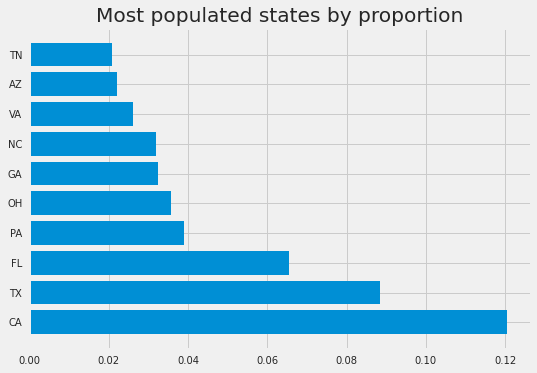

In [153]:
sorted_state_pop = state_population_wanted_cols.sort_values('US_population_proportion', ascending=False)
top_10_state_pops = sorted_state_pop.head(10)

plt.style.use('fivethirtyeight')
plt.barh(top_10_state_pops['state'], top_10_state_pops['US_population_proportion'])
plt.title('Most populated states by proportion')

In [154]:
# merging the columns into 1 dataframe
state_deathrow_population_merge = only_state.merge(state_population_wanted_cols, on='state')
state_deathrow_population_merge.head()

,state,death_row_per_state,proportion_deathrow_per_state,POPESTIMATE2019,US_population_proportion
0,TX,1068,0.145603,28995881,0.088338
1,CA,995,0.135651,39512223,0.120376
2,FL,992,0.135242,21477737,0.065433
3,AL,465,0.063395,4903185,0.014938
4,PA,412,0.056169,12801989,0.039002


In [155]:
# adding a column to see the difference between the deathrow proportions and population proportions
state_deathrow_population_merge['prop_on_dr_differnce_to_population_prop'] = state_deathrow_population_merge['proportion_deathrow_per_state'] - state_deathrow_population_merge['US_population_proportion']
state_deathrow_population_merge.head()

,state,death_row_per_state,proportion_deathrow_per_state,POPESTIMATE2019,US_population_proportion,prop_on_dr_differnce_to_population_prop
0,TX,1068,0.145603,28995881,0.088338,0.057266
1,CA,995,0.135651,39512223,0.120376,0.015275
2,FL,992,0.135242,21477737,0.065433,0.069809
3,AL,465,0.063395,4903185,0.014938,0.048457
4,PA,412,0.056169,12801989,0.039002,0.017167


The 'prop_on_dr_differnce_to_population_prop' (proportion on death row difference to US population proportion) is an important column. For example, Texas makes up nearly 15% of death row, but only makes up 9% of the american population - giving arounda  6% difference. If a state makes up 10% of the US population, it would be expected that state would make up 10% of death row as well.

Text(0.5, 1.0, 'highest proportion of people on death row compared to state population')

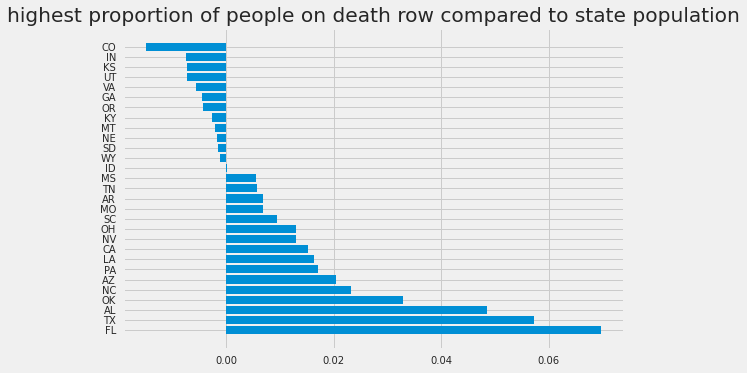

In [156]:
# visualising the data
biggest_prop_diff = state_deathrow_population_merge.sort_values('prop_on_dr_differnce_to_population_prop', ascending=False)
plt.barh(biggest_prop_diff['state'], biggest_prop_diff['prop_on_dr_differnce_to_population_prop'])
plt.title('highest proportion of people on death row compared to state population')

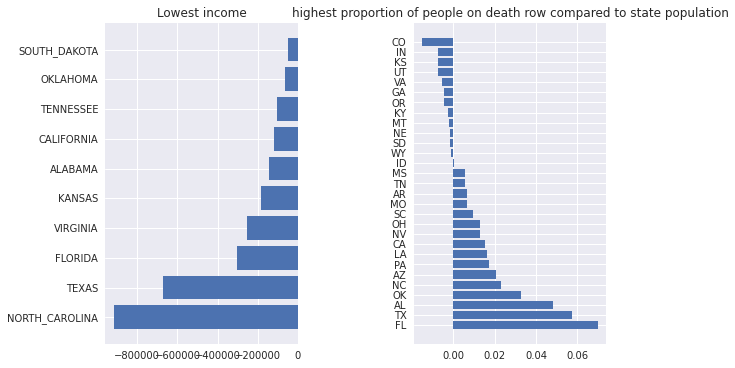

In [157]:
# see income and death row - population difference side by side

plt.style.use('seaborn')

x1 = lowest_net_10['STATE']
x2 = biggest_prop_diff['state']
y1 = lowest_net_10['TOTAL_NET_INCOME']
y2 = biggest_prop_diff['prop_on_dr_differnce_to_population_prop']

plt.subplot(1, 2, 1) 
plt.barh(x1, y1)
plt.title("Lowest income")


plt.subplot(1, 2, 2) 
plt.barh(x2, y2)
plt.title('highest proportion of people on death row compared to state population')

plt.subplots_adjust(wspace=0.6)
plt.show()

### Conclusion -> Income and death row

The top 3 states with the lowest income: North Carolina, Texas and Florida are 3 of the top 5 states with the biggest difference between population proportion and death row proportion. This suggests that low state income may be linked to more people from that state ending up on death row - possbly due to increased crime rates. Additionally, Alabama, California, Tennessee and Oklahoma are on the top lowest income list as well as having a positve deathrow - population difference (where a negative difference is desirable, having less people on death row than would be expected from your population). This means all of the top 5 worst states deathrow - population differences are part of the top 10 lowest incomes of states with capital punishment

In fact, only 3 of the top 10 lowest incomes don't have a positive deathrow - population difference (Virginia, Kansas and South Dakaota). but these negative differences are all only just smaller than 0, whereas Texas and Florida have around a .06 increase and are 2nd nd 3rd on the lowest income list (see graphs above) further supporting the link between low state income and increased chance on death row. 

## Child Abuse per state
The frontal and prefrontal lobes of the brain are not fully developed until about age 22 - these areas are responsible for regulating impulse control and judgement. Studies have shown that childhood trauma will biologically alter the developing brain. The [American Civil Liberties Union](https://www.aclu.org/other/juveniles-and-death-penalty) <sup>(5)</sup> found that "63 percent of federal death-row inmates suffered from two or more serious mental illness, intellectual disability or brain damage and chronic childhood abuse.

Could this explain why 14% of all death row inmates are from Texas? Let's compare a dataset that contains all of the child abuse victims per state to our death row dataset and see if there is a link.

In [158]:
states_child_abuse_victims = pd.read_csv('child_victims_csv.csv')
states_child_abuse_victims.head()

,State,Victims (unique count) Age <1,Victims (unique count) Age 1,Victims (unique count) Age 2,Victims (unique count) Age 3,Victims (unique count) Age 4,Victims (unique count) Age 5,Victims (unique count) Age 6,Victims (unique count) Age 7,Victims (unique count) Age 8,...,"Victims Age 8 \nRate per 1,000 Children","Victims Age 9 \nRate per 1,000 Children","Victims Age 10\nRate per 1,000 Children","Victims Age 11\nRate per 1,000 Children","Victims Age 12\nRate per 1,000 Children","Victims Age 13\nRate per 1,000 Children","Victims Age 14\nRate per 1,000 Children","Victims Age 15\nRate per 1,000 Children","Victims Age 16\nRate per 1,000 Children","Victims Age 17\nRate per 1,000 Children"
0,Alabama,"1,725",747,717,681,609,588,565,559,547,...,9.1,8.5,7.5,6.6,7.2,7.3,9.3,8.6,6.2,4.1
1,Alaska,359,222,203,184,193,180,174,164,159,...,15.6,14.8,13.1,12.1,10.6,11.4,10.3,8.5,7.4,5.2
2,Arizona,"2,525",650,657,573,523,517,463,499,449,...,5.0,4.4,4.2,3.8,3.6,3.5,3.8,3.7,3.5,2.1
3,Arkansas,"1,921",571,547,570,535,497,498,416,424,...,11.0,9.9,9.6,8.8,9.0,9.3,11.3,10.4,8.2,5.6
4,California,"10,616","4,411","4,123","3,970","3,632","3,688","3,623","3,530","3,430",...,6.9,6.4,5.9,5.6,5.4,5.5,5.2,5.2,4.7,3.7


Lets clean up the data a bit. We will remove states that are not included in the death row dataset i.e they do not have capital punishment, remove irrelevant columns and replace state names to their shortened versions, to match the original dataframe. 

In [159]:
victims_total_state = states_child_abuse_victims.loc[ :, ['State', ' Victims (unique count) Total  ']].copy()
# remove states with no capital punishment
clean_vict_total_state = victims_total_state.drop([1, 6, 7, 8, 11, 13, 15, 19, 20, 21, 22, 23, 29, 30,
        31, 32, 34, 39, 40, 46, 48, 49, 50, 52])
# swap the full state name with its abbreviation
clean_vict_total_state['state'] = clean_vict_total_state['State'].replace({'Alabama':'AL',
                                           'Arizona':'AZ',
                                           'Arkansas': 'AR',
                                          'California': 'CA',
                                          'Colorado': 'CO',
                                          'Florida': 'FL',
                                          'Georgia': 'GA',
                                          'Idaho': 'ID',
                                          'Indiana': 'IN',
                                          'Kansas': 'KS',
                                          'Kentucky': 'KY',
                                          'Louisiana': 'LA',
                                          'Mississippi': 'MS',
                                          'Missouri': 'MO',
                                          'Montana': 'MT',
                                          'Nebraska': 'NE',
                                          'Nevada': 'NV',
                                          'North Carolina': 'NC',
                                          'Ohio': 'OH',
                                          'Oklahoma': 'OK',
                                          'Oregon': 'OR',
                                          'Pennsylvania': 'PA',
                                          'South Carolina': 'SC',
                                          'South Dakota': 'SD',
                                          'Tennessee': 'TN',
                                          'Texas': 'TX',
                                          'Utah': 'UT',
                                          'Virginia': 'VA',
                                          'Wyoming': 'WY'})
clean_vict_total_state.head()

,State,Victims (unique count) Total,state
0,Alabama,10847.0,AL
2,Arizona,9909.0,AZ
3,Arkansas,9334.0,AR
4,California,65342.0,CA
5,Colorado,11578.0,CO


In [160]:
# merging the population dataframe and child victims dataframe
merged_vict_population = state_deathrow_population_merge.merge(clean_vict_total_state, on='state')
merged_vict_population.head()

,state,death_row_per_state,proportion_deathrow_per_state,POPESTIMATE2019,US_population_proportion,prop_on_dr_differnce_to_population_prop,State,Victims (unique count) Total
0,TX,1068,0.145603,28995881,0.088338,0.057266,Texas,61506.0
1,CA,995,0.135651,39512223,0.120376,0.015275,California,65342.0
2,FL,992,0.135242,21477737,0.065433,0.069809,Florida,40103.0
3,AL,465,0.063395,4903185,0.014938,0.048457,Alabama,10847.0
4,PA,412,0.056169,12801989,0.039002,0.017167,Pennsylvania,4625.0


To get a better understanding of states with high child abuse, we add a column with a the amount of child victims per 100,000 as well as deathrow per 100,000

In [161]:
merged_vict_population[' Victims (unique count) Total  '] = merged_vict_population[' Victims (unique count) Total  '].astype('int')
merged_vict_population['cv_rate_per_100,000'] = (merged_vict_population[' Victims (unique count) Total  ']) / (merged_vict_population['POPESTIMATE2019']) * 100000
merged_vict_population['dr_rate_per_100,000'] = (merged_vict_population['death_row_per_state']) / (merged_vict_population['POPESTIMATE2019']) * 100000
merged_vict_population.head()

,state,death_row_per_state,proportion_deathrow_per_state,POPESTIMATE2019,US_population_proportion,prop_on_dr_differnce_to_population_prop,State,Victims (unique count) Total,"cv_rate_per_100,000","dr_rate_per_100,000"
0,TX,1068,0.145603,28995881,0.088338,0.057266,Texas,61506,212.119783,3.683282
1,CA,995,0.135651,39512223,0.120376,0.015275,California,65342,165.371612,2.518208
2,FL,992,0.135242,21477737,0.065433,0.069809,Florida,40103,186.718927,4.618736
3,AL,465,0.063395,4903185,0.014938,0.048457,Alabama,10847,221.223552,9.483632
4,PA,412,0.056169,12801989,0.039002,0.017167,Pennsylvania,4625,36.127199,3.218250


In [162]:
merged_cv_population_sorted = merged_vict_population.sort_values('cv_rate_per_100,000', ascending=False)
merged_cv_population_sorted.head()

,state,death_row_per_state,proportion_deathrow_per_state,POPESTIMATE2019,US_population_proportion,prop_on_dr_differnce_to_population_prop,State,Victims (unique count) Total,"cv_rate_per_100,000","dr_rate_per_100,000"
19,KY,80,0.010907,4467673,0.013611,-0.002704,Kentucky,22410,501.603407,1.790641
18,IN,96,0.013088,6732219,0.020510,-0.007422,Indiana,29198,433.705439,1.425979
7,OK,329,0.044853,3956971,0.012055,0.032798,Oklahoma,14457,365.355217,8.314441
17,MS,107,0.014588,2976149,0.009067,0.005521,Mississippi,10429,350.419283,3.595250
13,SC,184,0.025085,5148714,0.015686,0.009399,South Carolina,17071,331.558521,3.573708


Text(0.5, 1.0, 'States with highest number of child abuse for every 100,000')

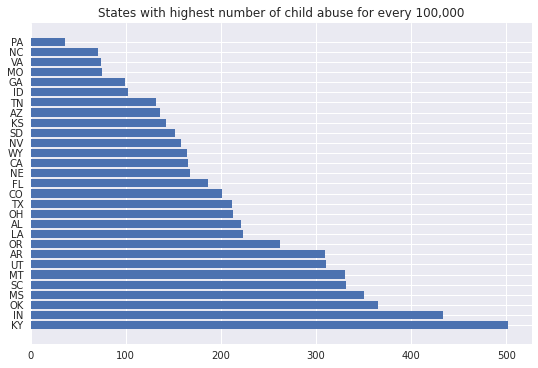

In [163]:
plt.barh(merged_cv_population_sorted['state'], merged_cv_population_sorted['cv_rate_per_100,000'])
plt.title('States with highest number of child abuse for every 100,000')

We now see states with highest number of people on death row per 100,000 to compare

In [164]:
merged_dr_population_sorted = merged_vict_population.sort_values('dr_rate_per_100,000', ascending=False)
merged_dr_population_sorted.head()

,state,death_row_per_state,proportion_deathrow_per_state,POPESTIMATE2019,US_population_proportion,prop_on_dr_differnce_to_population_prop,State,Victims (unique count) Total,"cv_rate_per_100,000","dr_rate_per_100,000"
3,AL,465,0.063395,4903185,0.014938,0.048457,Alabama,10847,221.223552,9.483632
7,OK,329,0.044853,3956971,0.012055,0.032798,Oklahoma,14457,365.355217,8.314441
14,NV,164,0.022359,3080156,0.009384,0.012975,Nevada,4859,157.751750,5.324406
9,LA,224,0.030539,4648794,0.014163,0.016376,Louisiana,10356,222.767453,4.818454
2,FL,992,0.135242,21477737,0.065433,0.069809,Florida,40103,186.718927,4.618736


Text(0.5, 1.0, 'States with highest number of people on death row for every 100,000')

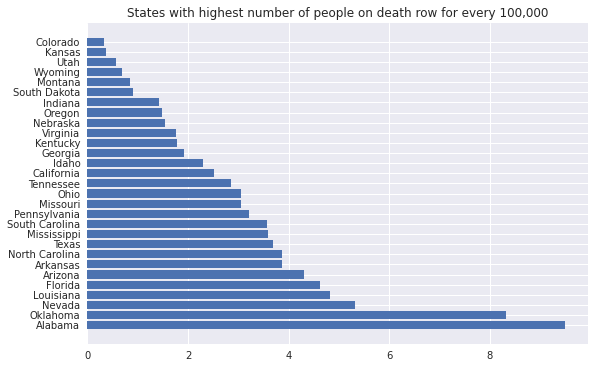

In [165]:
plt.barh(merged_dr_population_sorted['State'], merged_dr_population_sorted['dr_rate_per_100,000'])
plt.title('States with highest number of people on death row for every 100,000')

Text(0, 0.5, 'Death row proportion values')

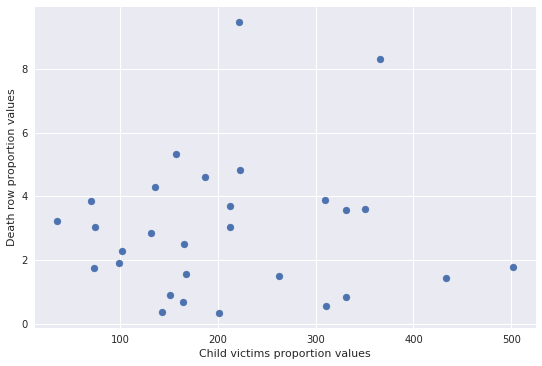

In [166]:
#scatter plot to show variables before working out the correlation
plt.scatter(merged_vict_population['cv_rate_per_100,000'], merged_vict_population['dr_rate_per_100,000']);
plt.xlabel('Child victims proportion values')
plt.ylabel('Death row proportion values')

In [167]:
corr, _ = pearsonr(merged_vict_population['cv_rate_per_100,000'], merged_vict_population['dr_rate_per_100,000'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.049


There is a very small positive correlation between the proportions of people on death row by state and the proportions of victims of child abuse for each state. But this is so small it is likely insignificant revealing that states with higher propotions of victims of child abuse are not very likely to have higher proportions of people on death row compared to its population.

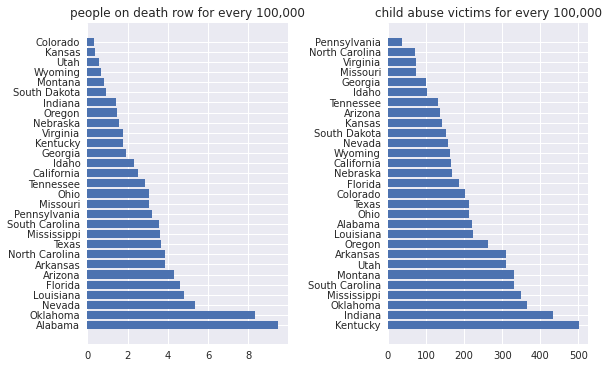

In [168]:
plt.style.use('seaborn')

x1 = merged_dr_population_sorted['State']
x2 = merged_cv_population_sorted['State']
y1 = merged_dr_population_sorted['dr_rate_per_100,000']
y2 = merged_cv_population_sorted['cv_rate_per_100,000']

plt.subplot(1, 2, 1) 
plt.barh(x1, y1)
plt.title("people on death row for every 100,000")


plt.subplot(1, 2, 2) 
plt.barh(x2, y2)
plt.title("child abuse victims for every 100,000")

plt.subplots_adjust(wspace=0.5)
plt.show()

### Conclusion -> child abuse and death row

The rates per 100,000 people yield inconclusive results - States like Kentucky and Indiana (top of number of child victims per 100,000) are low down in child abuse per 100,000, however states like Oklahoma and Arkansas are fairly high up on both lists. 
If child abuse does play a role in leading to increased chance on deathrow, it is a  small one with other factors playing a more important role. 

Since we already have the lowest state income dataset, do states which make the most loss on revenue have most child abuse?

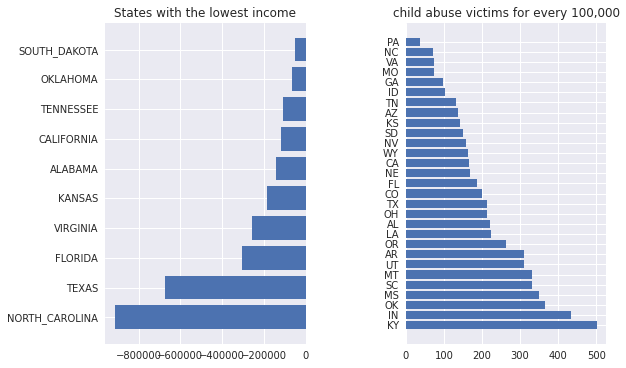

In [169]:
plt.style.use('seaborn')

x1 = lowest_net_10['STATE']
x2 = merged_cv_population_sorted['state']
y1 = lowest_net_10['TOTAL_NET_INCOME']
y2 = merged_cv_population_sorted['cv_rate_per_100,000']

plt.subplot(1, 2, 1) 
plt.barh(x1, y1)
plt.title("States with the lowest income")


plt.subplot(1, 2, 2) 
plt.barh(x2, y2)
plt.title("child abuse victims for every 100,000")

plt.subplots_adjust(wspace=0.5)
plt.show()

From this, there seems to be no evidence that states with low incomes are the states with highest child abuse rates, however so much so with only Oklahoma being in the top 10 for both, lets look into if states with higher incomes are states with higher child abuse -> perhaps richer states are harder on children to ensure they grow up to get a good job?

In [170]:
highest_net_10 = state_education.sort_values('TOTAL_NET_INCOME', ascending=False).head(10)
highest_net_10.head()


,PRIMARY_KEY,STATE,TOTAL_REVENUE,TOTAL_EXPENDITURE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,TOTAL_NET_INCOME
35,2015_OHIO,OHIO,24378660,22561728,244,285,225,266,1816932
14,2015_INDIANA,INDIANA,12456571,11378564,248,287,227,268,1078007
2,2015_ARIZONA,ARIZONA,8230507,7902600,238,283,215,263,327907
38,2015_PENNSYLVANIA,PENNSYLVANIA,29967185,29690645,243,284,227,269,276540
44,2015_UTAH,UTAH,4705084,4537962,243,286,226,269,167122


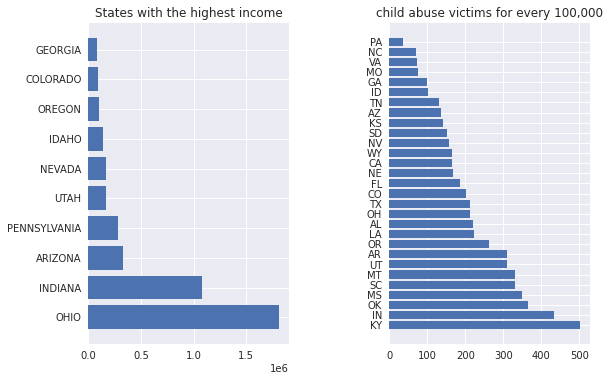

In [171]:
plt.style.use('seaborn')

x1 = highest_net_10['STATE']
x2 = merged_cv_population_sorted['state']
y1 = highest_net_10['TOTAL_NET_INCOME']
y2 = merged_cv_population_sorted['cv_rate_per_100,000']

plt.subplot(1, 2, 1) 
plt.barh(x1, y1)
plt.title("States with the highest income")


plt.subplot(1, 2, 2) 
plt.barh(x2, y2)
plt.title("child abuse victims for every 100,000")

plt.subplots_adjust(wspace=0.5)
plt.show()

### Conclusion -> child abuse and income

There does not appear to be any link between states with low income and states with high child abuse rates with only Oklahoma in the top 10 for both.
Moreover, there does not appear to be a link between high income states and child abuse either with only 2 states (Indiana and Utah in the top 10 for both).

## Education and death row 

Now lets see if education effects the number of people on death row and if states with lower grades have lower revenue. It has been found that worse grades at school can serve as a predictor of behaviour problelms and criminality in later life (Katsiyannis, 2013). We look to support this finding.
Remember we already have a dataframe 'state_grades' with education scores on maths and reading.

We  first add columns 'avg_math_reading_8' taking the average of math grade 8 and reading grade 8 and 'avg_math_reading_4' doing the same for grade 4.

In [172]:
state_education.head(10)

,PRIMARY_KEY,STATE,TOTAL_REVENUE,TOTAL_EXPENDITURE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,TOTAL_NET_INCOME
0,2015_ALABAMA,ALABAMA,7360222,7501799,231,267,217,259,-141577
2,2015_ARIZONA,ARIZONA,8230507,7902600,238,283,215,263,327907
3,2015_ARKANSAS,ARKANSAS,5308625,5350543,235,275,218,259,-41918
4,2015_CALIFORNIA,CALIFORNIA,78248042,78365958,232,275,213,259,-117916
5,2015_COLORADO,COLORADO,9648297,9557682,242,286,224,268,90615
9,2015_FLORIDA,FLORIDA,26971491,27277049,243,275,227,263,-305558
10,2015_GEORGIA,GEORGIA,18584666,18501103,236,279,222,262,83563
12,2015_IDAHO,IDAHO,2167967,2029520,239,284,222,269,138447
14,2015_INDIANA,INDIANA,12456571,11378564,248,287,227,268,1078007
16,2015_KANSAS,KANSAS,5991731,6175724,241,284,221,267,-183993


In [173]:
state_grades = state_education.loc[ : ,['STATE', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']]
state_grades['avg_math_reading_8'] = (state_grades['AVG_MATH_8_SCORE'] + state_grades['AVG_READING_8_SCORE']) / 2
state_grades['avg_math_reading_4'] = (state_grades['AVG_MATH_4_SCORE'] + state_grades['AVG_READING_4_SCORE']) / 2
state_grades.head()

,STATE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,avg_math_reading_8,avg_math_reading_4
0,ALABAMA,231,267,217,259,263.0,224.0
2,ARIZONA,238,283,215,263,273.0,226.5
3,ARKANSAS,235,275,218,259,267.0,226.5
4,CALIFORNIA,232,275,213,259,267.0,222.5
5,COLORADO,242,286,224,268,277.0,233.0


Lets compare states with highest deathrow proportions with states with the lowest grades at grade 4. Do less educated states have higher deathrow statistics?

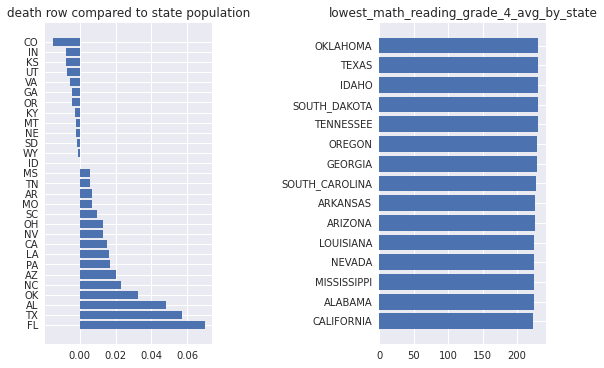

In [174]:
lowest_grades_sorted_math_reading_4_avg = state_grades.sort_values('avg_math_reading_4', ascending=True)
lowest_grades_sorted_math_reading_4_avg_top = lowest_grades_sorted_math_reading_4_avg.head(15)

plt.style.use('seaborn')

x1 = biggest_prop_diff['state']
x2 = lowest_grades_sorted_math_reading_4_avg_top['STATE']
y1 = biggest_prop_diff['prop_on_dr_differnce_to_population_prop']
y2 = lowest_grades_sorted_math_reading_4_avg_top['avg_math_reading_4']

plt.subplot(1, 2, 1) 
plt.barh(x1, y1)
plt.title("death row compared to state population")


plt.subplot(1, 2, 2) 
plt.barh(x2, y2)
plt.title("lowest_math_reading_grade_4_avg_by_state")


plt.subplots_adjust(wspace=1)
plt.show()

The top 8 lowest states regarding grade 4 education all have positive (remember this is undesirable) deathrow - population difference.

Now lets compare grade 4 grades to people on deathrow per 100,000 to get another comparison to increase the reliability of the conclusion 

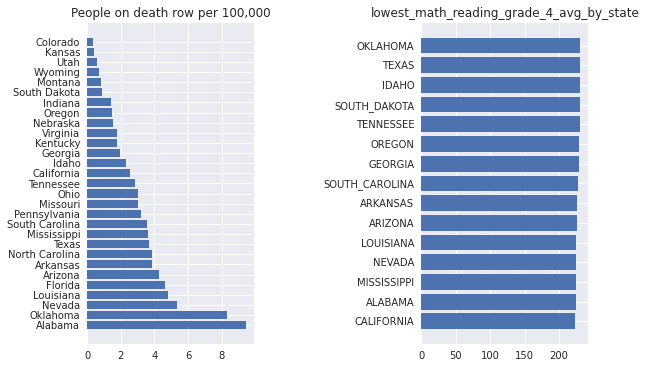

In [175]:
plt.style.use('seaborn')

x1 = merged_dr_population_sorted['State']
x2 = lowest_grades_sorted_math_reading_4_avg_top['STATE']
y1 = merged_dr_population_sorted['dr_rate_per_100,000']
y2 = lowest_grades_sorted_math_reading_4_avg_top['avg_math_reading_4']

plt.subplot(1, 2, 1) 
plt.barh(x1, y1)
plt.title("People on death row per 100,000")


plt.subplot(1, 2, 2) 
plt.barh(x2, y2)
plt.title("lowest_math_reading_grade_4_avg_by_state")


plt.subplots_adjust(wspace=1)
plt.show()

Alabama, Louisiana and Nevada are in the top 5 states for both lowest grade 4 grades and highest number on death row per 100,000. Additionally, Mississippi, Arkansas and South Carolina are high up on both.

Do states with the lowest grade 8 math and reading average also have higher numbers of people on death row than would be expected?

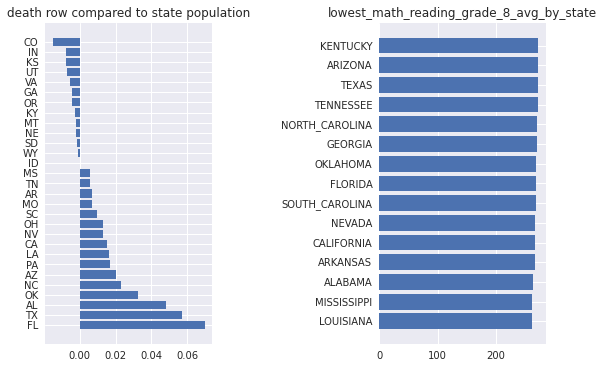

In [176]:
lowest_grades_sorted_math_reading_8_avg = state_grades.sort_values('avg_math_reading_8', ascending=True)
lowest_grades_sorted_math_reading_8_avg_top = lowest_grades_sorted_math_reading_8_avg.head(15)

plt.style.use('seaborn')

x1 = biggest_prop_diff['state']
x2 = lowest_grades_sorted_math_reading_8_avg_top['STATE']
y1 = biggest_prop_diff['prop_on_dr_differnce_to_population_prop']
y2 = lowest_grades_sorted_math_reading_8_avg_top['avg_math_reading_8']

plt.subplot(1, 2, 1) 
plt.barh(x1, y1)
plt.title("death row compared to state population")


plt.subplot(1, 2, 2) 
plt.barh(x2, y2)
plt.title("lowest_math_reading_grade_8_avg_by_state")


plt.subplots_adjust(wspace=1)
plt.show()

All of the top 15 lowest grade 8 grades except Kentucky and Georgia (but all of top 8) have positive (remember this is undesirable) deathrow - population difference.

And now comparing grade 8 to deathrow per 100,000

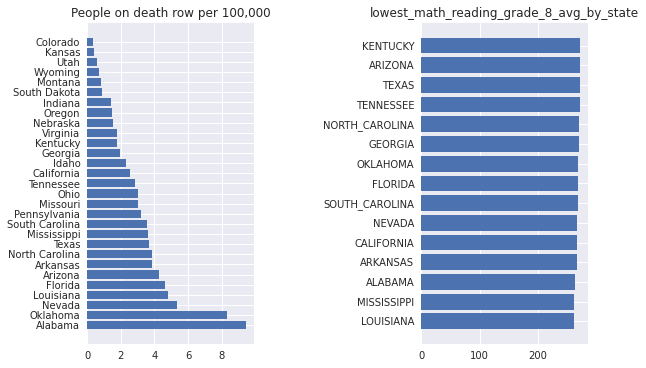

In [177]:
plt.style.use('seaborn')

x1 = merged_dr_population_sorted['State']
x2 = lowest_grades_sorted_math_reading_8_avg_top['STATE']
y1 = merged_dr_population_sorted['dr_rate_per_100,000']
y2 = lowest_grades_sorted_math_reading_8_avg_top['avg_math_reading_8']

plt.subplot(1, 2, 1) 
plt.barh(x1, y1)
plt.title("People on death row per 100,000")


plt.subplot(1, 2, 2) 
plt.barh(x2, y2)
plt.title("lowest_math_reading_grade_8_avg_by_state")


plt.subplots_adjust(wspace=1)
plt.show()

Alabama, Louisiana and Nevada are in the top 4 for both statistics. Moreover, Mississippi, Arkansas, Oklahoma, Florida and even North carolina are high up / fairly high up on both.

### Conclusion -> Education and death row

There does seem to be a link between states with the lowest education at both grade 4 and grade 8 level and that state being high up on the number of people on deathrow compared to its population and number of people on deathrow per 100,000. States which have worst grades at both 4 and 8 level also were usually high up on the people on deathrow per 100,000 list and all of the states with the top 8 lowest grades at both 4 and 8 level had more people on deathrow than would be expected from their poplation.

### multiple regression

Can scores on maths grade 4 and reading grade 4 be used to predict the average score of math and reading grade 8 -> if it can this is good because as seen above, states with low average maths and reading in 8th grade are the states more likely to have more people on death row than would be expected.
If grade 4 maths and grade 4 reading can be used to predict grade 8 math-reading average, the government can see the states where childrens grades at grade 4 level are bad and focus on these states looking into the quality of teaching and schools to ensure they don't get a bad grade 8 math-reading average, as this gives an increased chance of the state ending up with more people on death row.

First, lets see if math grade 4 and reading grade 4 are correlated with average math-reading grade 8

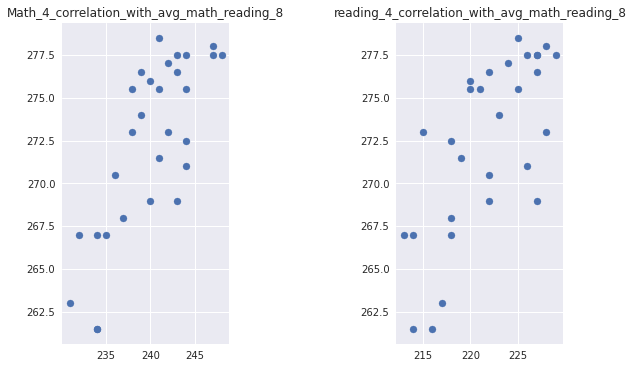

In [178]:
plt.style.use('seaborn')

x1 = state_grades['AVG_MATH_4_SCORE']
x2 = state_grades['AVG_READING_4_SCORE']
y1 = state_grades['avg_math_reading_8']
y2 = state_grades['avg_math_reading_8']

plt.subplot(1, 2, 1) 
plt.scatter(x1, y1)
plt.title("Math_4_correlation_with_avg_math_reading_8")


plt.subplot(1, 2, 2) 
plt.scatter(x2, y2)
plt.title("reading_4_correlation_with_avg_math_reading_8")


plt.subplots_adjust(wspace=1)
plt.show()

In [179]:
from scipy.stats import linregress
math_4_overall_8_lin_results = linregress(state_grades['AVG_MATH_4_SCORE'], state_grades['avg_math_reading_8'])
print(math_4_overall_8_lin_results)
m_4_overall_8_rvalue = math_4_overall_8_lin_results[2]
print('')

reading_4_overall_8_lin_results = linregress(state_grades['AVG_READING_4_SCORE'], state_grades['avg_math_reading_8'])
print(reading_4_overall_8_lin_results)
r_4_overall_8_rvalue = reading_4_overall_8_lin_results[2]
print('')

print('rvalue(math_4_overall_8)= ', m_4_overall_8_rvalue)
print('rvalue(reading_4_overall_8)= ', r_4_overall_8_rvalue)

LinregressResult(slope=0.8755677743246469, intercept=62.1611283767632, rvalue=0.7759397913073826, pvalue=7.589146482008469e-07, stderr=0.13698605226036242, intercept_stderr=32.88705278377025)

LinregressResult(slope=0.7466788702928872, intercept=106.74510983263596, rvalue=0.7073626631586748, pvalue=1.7804609934018057e-05, stderr=0.14359443359534654, intercept_stderr=31.850663380119688)

rvalue(math_4_overall_8)=  0.7759397913073826
rvalue(reading_4_overall_8)=  0.7073626631586748


Perhaps unsurprisngly, the Grade 4 maths score has a high positive correlation with the average math and reading grade 8 score, likewise the grade 4 reading score also has a similarly high positive correlation in predicting the average math-reading grade 8 score.
Lets use both grade 4 math and grade 4 reading to predict the average math reading grade 8 score. Remember, being able to predict the average math-reading grade 8 score is useful as the states with low grade 8 scores also seem to be the states with increased chance of people ending up on death row.

In [180]:
state_grades_useful = state_grades.loc[ : ,['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'avg_math_reading_8']]

In [181]:
# first split the dataframe into 2 groups, a training set and a testing set
N = len(state_grades_useful)
half_N = int(N / 2)
# Shuffle data frame by taking random sample with same number of rows.
shuffled_state_grades = state_grades_useful.sample(n=N, replace=False)
train = shuffled_state_grades.iloc[:half_N]
test = shuffled_state_grades.iloc[half_N:]
print(len(train), 'training and', len(test), 'test instances.')

14 training and 15 test instances.


In [182]:
# make a function to predict the math-reading grade 8 average, multiply each attributes score by its corresponding slope
def predict(slopes, row):
    return np.sum(slopes * np.array(row))

# start with a random prediction
example_row = test.drop(columns='avg_math_reading_8').iloc[0]
print('Predicting math-reading-8 for:', example_row)
# generate slopes around 2
example_slopes = np.random.normal(2, 0.2, len(example_row))
print('Using slopes:', example_slopes)
print('Result:', predict(example_slopes, example_row))

Predicting math-reading-8 for: AVG_MATH_4_SCORE       234
AVG_READING_4_SCORE    216
Name: 18, dtype: int64
Using slopes: [1.99603642 1.74457289]
Result: 843.9002658373756


In [183]:
print('Actual avg_math_reading_8:', test['avg_math_reading_8'].iloc[0])
print('Predicted avg_math_reading_8 using random slopes:', predict(example_slopes, example_row))

Actual avg_math_reading_8: 261.5
Predicted avg_math_reading_8 using random slopes: 843.9002658373756


The predicted 'avg_math_reading_8' is not near the actual score as random slopes were used

In [184]:
train_math_read_8 = train['avg_math_reading_8']
train_attributes = train.drop(columns='avg_math_reading_8')

# make a function to compute the root mean squared error of all the training examples for the random slopes

def rmse(slopes, attributes, y_values):
    errors = []
    for i in np.arange(len(y_values)):
        predicted = predict(slopes, attributes.iloc[i])
        actual = y_values.iloc[i]
        errors.append((actual - predicted) ** 2)
    return np.sqrt(np.mean(errors))

def rmse_train(slopes):
    return rmse(slopes, train_attributes, train_math_read_8)

print('RMSE of all training examples using random slopes:', rmse_train(example_slopes))

RMSE of all training examples using random slopes: 591.3520876503577


We now have something for minimize to work with and generate the best slopes to minimize the root mean squared error (RMSE)

In [185]:
from scipy.optimize import minimize
multi_res = minimize(rmse_train, example_slopes)
multi_res

      fun: 2.4512137096445508
 hess_inv: array([[ 0.51420935, -0.55551998],
       [-0.55551998,  0.6001995 ]])
      jac: array([-2.98023224e-08, -2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 7
     njev: 15
   status: 0
  success: True
        x: array([0.90543161, 0.25026754])

In [186]:
best_slopes = multi_res.x
print('The best slopes for the training set:')
print('RMSE of all training examples using the best slopes:', rmse_train(best_slopes))
pd.DataFrame(data=[best_slopes], columns=train_attributes.columns)

The best slopes for the training set:
RMSE of all training examples using the best slopes: 2.4512137096445508


,AVG_MATH_4_SCORE,AVG_READING_4_SCORE
0,0.905432,0.250268


We now have the best slopes worked out from the training set with a corresponding training set RMSE.

Do we get a similar RMSE when applying these slopes to our test set, if we do this would mean our regression prediction method is reliable to make predictions on other samples from the same population

In [187]:
test_grades = test['avg_math_reading_8']
test_attributes = test.drop(columns='avg_math_reading_8')

def rmse_test(slopes):
    return rmse(slopes, test_attributes, test_grades)

rmse_linear = rmse_test(best_slopes)
print('Test set RMSE for multiple linear regression:', rmse_linear)

Test set RMSE for multiple linear regression: 4.048908815271262


The RMSE is similar for the test set, this means that our prediction of average math-reading grade 8 scores is off by around 3 marks

Text(0.5, 1.0, 'Linear regression model predicting average math-reading grade 8 score')

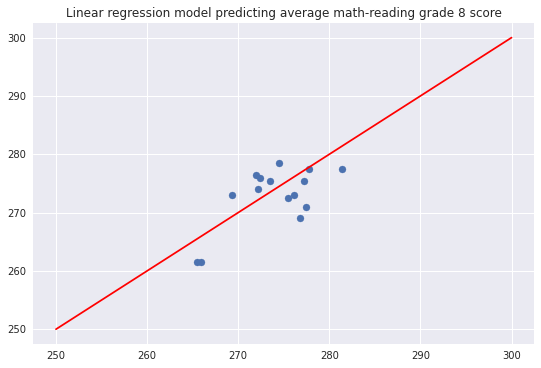

In [188]:
def fit(row):
    return sum(best_slopes * np.array(row))

fitted = test_attributes.apply(fit, axis=1)
plt.scatter(fitted, test_grades)
# Plot x=y line.
plt.plot([250, 300], [250, 300], color='red');
plt.title('Linear regression model predicting average math-reading grade 8 score')

The predictions are clearly not perfect (the red line) with some points deviating from the line, however it looks like a good prediction model 

Lets now see the residual plot of how the regression predictions compared to the actual grades

Text(0.5, 1.0, 'Multiple regression residual plot')

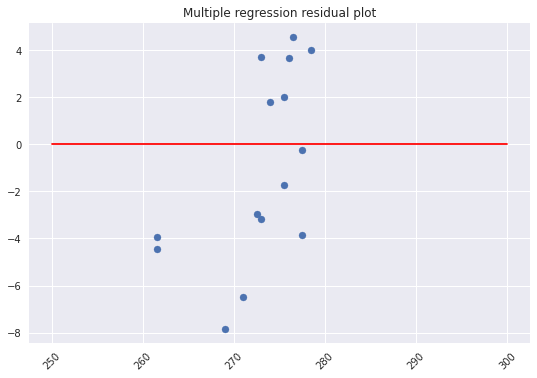

In [189]:
plt.scatter(test_grades, test_grades - fitted)
plt.plot([250, 300], [0, 0], color='red')
plt.xticks(rotation=45);
plt.title('Multiple regression residual plot')

For a good multiple regression, the residual plot should be centred around 0. It is, meaning the multiple regrssion is reliable.

###  conclusion -> Multiple regression

States grade 4 maths and reading scores can be used to reliably predict that states combined math and reading average score at grade 8 level. This is important since states with low grade 8 math-reading averages are the same states that tend to have more of its population on death row than they should. Therefore, states should be wary if they see low grade 4 scores for maths and english and invest in math and reading programmes and interventions to protect their students future's.

# Homelessness per state

It has been found that homelessness can be linked to criminality and that homelessness also has a strong tendancy to occur with mental illnesses (Pruett, 1990). This analysis will look to expand on this finding and support it looking into if states with higher homelessness rates are also the states with higher capital punishment rates.

We will now look to state homelessness and see if states with higher homelessness rates also have higher deathrow rates.

This US homeless data set is from Kaggle (https://www.kaggle.com/umerkk12/homelessness-in-us) with information about multiple types of homelessness per state in 2012 and 2013.

In [190]:
# getting our homeless Dataset
homeless = pd.read_csv('state_homeless.csv')
homeless.head()

,ID,State,Variable,2013,2012,% Change from 2012,Percentage of Total Homeless Populaiton (2013),"Rate per 10,000"
0,Guam - Chronic individuals,Guam,Chronic individuals,51,22.0,131.82%,4.0%,3.20
1,New York - Chronic individuals,New York,Chronic individuals,4045,4324.0,-6.45%,5.2%,2.06
2,Maine - Chronic individuals,Maine,Chronic individuals,159,222.0,-28.38%,5.3%,1.20
3,North Dakota - Chronic individuals,North Dakota,Chronic individuals,110,81.0,35.80%,5.3%,1.52
4,Delaware - Chronic individuals,Delaware,Chronic individuals,65,84.0,-22.62%,6.9%,0.70


In [191]:
homeless['Variable'].value_counts()

Veterans                            54
Homeless persons                    54
Chronic individuals                 54
Family Households                   54
Chronic Persons in Families         54
Unsheltered persons                 54
Unaccompanied Children and youth    54
Persons in families                 54
Name: Variable, dtype: int64

For this specific analysis we will only be looking at those labeleld 'Homeless persons'

In [192]:
homeless_persons = homeless['Variable'] == 'Homeless persons'
homeless_df = homeless[homeless_persons]
# add a column rate pre 100,000 people to keep the comparison consistent with the people on death row data set
homeless_df['rate_per_100,000'] = homeless_df['Rate per 10,000'] / 10
homeless_df.head()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ID,State,Variable,2013,2012,% Change from 2012,Percentage of Total Homeless Populaiton (2013),"Rate per 10,000","rate_per_100,000"
162,Alabama - Homeless persons,Alabama,Homeless persons,4689,5209.0,-9.98%,NaN,9.70,0.970
163,Alaska - Homeless persons,Alaska,Homeless persons,1946,1913.0,1.73%,NaN,26.47,2.647
164,Arizona - Homeless persons,Arizona,Homeless persons,10562,11302.0,-6.55%,NaN,15.94,1.594
165,Arkansas - Homeless persons,Arkansas,Homeless persons,3812,4214.0,-9.54%,NaN,12.88,1.288
166,California - Homeless persons,California,Homeless persons,136826,130898.0,4.53%,NaN,35.69,3.569


We  will now only show the columns needed for our analysis

In [193]:
homeless_wanted_cols = homeless_df.loc[ : ,['State', '2013', 'rate_per_100,000']]
homeless_wanted_cols.head()


,State,2013,"rate_per_100,000"
162,Alabama,4689,0.970
163,Alaska,1946,2.647
164,Arizona,10562,1.594
165,Arkansas,3812,1.288
166,California,136826,3.569


In [194]:
# remove states with no capital punishment
clean_homeless = homeless_wanted_cols.drop([163, 168, 169, 170, 173, 174, 176, 178, 182, 183, 184, 185, 186, 192, 193, 194, 195, 197, 203, 208, 210, 212, 213, 214])
clean_homeless

,State,2013,"rate_per_100,000"
162,Alabama,4689,0.970
164,Arizona,10562,1.594
165,Arkansas,3812,1.288
166,California,136826,3.569
167,Colorado,9754,1.851
171,Florida,47862,2.448
172,Georgia,16971,1.698
175,Idaho,1781,1.105
177,Indiana,6096,0.928
179,Kansas,2693,0.931


In [195]:
# show the states with the most homelessness
ordered_homeless_wanted_cols = clean_homeless.sort_values('rate_per_100,000', ascending=False)
ordered_homeless_wanted_cols_top_15 = ordered_homeless_wanted_cols.head(15)
ordered_homeless_wanted_cols_top_15.head()

,State,2013,"rate_per_100,000"
166,California,136826,3.569
200,Oregon,13822,3.517
191,Nevada,8443,3.026
171,Florida,47862,2.448
167,Colorado,9754,1.851


Lets compare the states with the highest homelessness and deathrow rates per 100,000 people

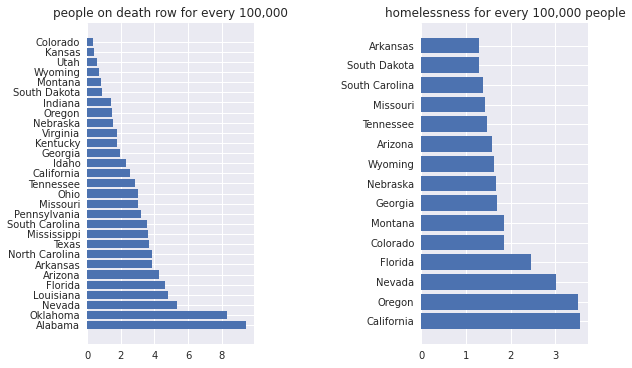

In [196]:
plt.style.use('seaborn')

x1 = merged_dr_population_sorted['State']
x2 = ordered_homeless_wanted_cols_top_15['State']
y1 = merged_dr_population_sorted['dr_rate_per_100,000']
y2 = ordered_homeless_wanted_cols_top_15['rate_per_100,000']

plt.subplot(1, 2, 1) 
plt.barh(x1, y1)
plt.title("people on death row for every 100,000")


plt.subplot(1, 2, 2) 
plt.barh(x2, y2)
plt.title("homelessness for every 100,000 people")

plt.subplots_adjust(wspace=1)
plt.show()

## Conclusion -> Homelessness



Homelessness does not seem to play a role in if people end up on death row, states with the highest homelessness rates are not high up on the deathrow rate per 100,000. Only Nevada and Florida are in the top 10 for both.

# Investigating NaN values
We have looked at a range of different trends using the data set so far, however, given what we have found so far regarding the possible prejudice within the death row system, the amount of NaN values there are may raise another question. Why are prisons not recording these things adequately? Let's have a look at the amount of missing values again.

In [197]:
deathrow.isna().sum()

Status                    0   
state                     0   
sentencing_date           7   
sentencing_year           7   
full_name                 0   
last_name                 0   
first_name                0   
race                      0   
County                    10  
DOB                       816 
gender                    0   
currently_on_death_row    4   
executed                  4   
volunteer_execution       7203
died                      6743
suicide                   7232
commuted                  7267
exonerated                7203
resentenced               4962
current_sentence          4938
released                  7001
dtype: int64

It is quite peculiar that whilst we have information regarding the basic demographics, prisons struggle to keep a record of a lot of concerning issues, such as how many individuals have died of anything other than execution, namely suicide and volunteer execution. We also do not know how many individuals have been exonerated, released, commuted or resentenced exactly.

This at first may seem to be due to poor record keeping, which is understandable, since it has not always been a digital process, so some information may have been hard to retrieve. However, prisons keep a wealth of other personal information about their prisoners, such as bodily state, occupation, character, religion, marital status, weight etc. - why is there so much information missing from this dataset when prisons are able to retrieve and keep hold of so much of this data? The Intercept states that the suicides and 'volunteers' for example are undercounted, due to simply not being recorded or made public. This no doubt sparks controversy regarding why exactly this may be the case.

Let's take exonerations for example. 

In [198]:
# the amount of exonerated people the data says there are
exonerated = deathrow[ (deathrow['exonerated'] == 'Y') ]
len(exonerated)

132

We should have a look at the NaN values for exonerations and find out whether we can change any of these. Our first approach is to find out whether we can use our existing data to find this out. We will use groupby to show who fits all these criteria: not been executed, not currently on death row, been released, resentenced and commuted.

In [199]:
# investigating NaN values
nan_exonerated = deathrow[deathrow['exonerated'].isnull()]
est = nan_exonerated.groupby(['executed', 'currently_on_death_row', 'released', 'resentenced', 'commuted'])
est_exon = est.get_group(('N', 'N', 'Y', 'Y', 'Y'))
est_exon

,Status,state,sentencing_date,sentencing_year,full_name,last_name,first_name,race,County,DOB,...,currently_on_death_row,executed,volunteer_execution,died,suicide,commuted,exonerated,resentenced,current_sentence,released
number,,,,,,,,,,,,,,,,,,,,,
3393,Not Currently on Death Row,LA,1985-02-07,1985.0,Anthony Scire,Scire,Anthony,White,Orleans,1945-01-01,...,N,N,NaN,NaN,NaN,Y,NaN,Y,TIME,Y
5940,Not Currently on Death Row,TN,1996-04-26,1996.0,James Montgomery,Montgomery,James,Black,Shelby,1967-12-22,...,N,N,NaN,NaN,NaN,Y,NaN,Y,27Y,Y


These are two more possible individuals that have been exonerated. A quick google search shows that both Anthony Scire and James Montgomery were indeed exonerated. We should add them to our data. 

In [200]:
# changing NaN value to Y
deathrow.at[3393, 'exonerated']= 'Y'
deathrow.at[5940, 'exonerated']= 'Y'

est_exon.at[3393, 'exonerated']= 'Y'
est_exon.at[5940, 'exonerated']= 'Y'

In [201]:
est_exonerated = pd.concat([exonerated, est_exon])
est_exonerated.head()

,Status,state,sentencing_date,sentencing_year,full_name,last_name,first_name,race,County,DOB,...,currently_on_death_row,executed,volunteer_execution,died,suicide,commuted,exonerated,resentenced,current_sentence,released
number,,,,,,,,,,,,,,,,,,,,,
3,Not Currently on Death Row,AL,1977-01-01,1977.0,James Willie Cochran,Cochran,James,Black,Jefferson,1943-01-01,...,N,N,NaN,NaN,NaN,NaN,Y,Y,DR,Y
23,Not Currently on Death Row,AL,1978-03-10,1978.0,Charles Lee Bufford,Bufford,Charles,Black,Wilcox,1955-01-01,...,N,N,NaN,NaN,NaN,NaN,Y,NaN,NaN,Y
121,Not Currently on Death Row,AL,1986-12-15,1986.0,Anthony Ray Hinton,Hinton,Anthony,Black,Jefferson,1957-01-01,...,N,N,NaN,NaN,NaN,NaN,Y,NaN,NaN,Y
140,Not Currently on Death Row,AL,1988-09-19,1988.0,Walter McMillian,McMillian,Walter,Black,Monroe,1941-01-01,...,N,N,NaN,NaN,NaN,NaN,Y,NaN,NaN,Y
189,Not Currently on Death Row,AL,1992-05-22,1992.0,Larry Randall Padgett,Padgett,Larry,White,Marshall,1950-01-01,...,N,N,NaN,NaN,NaN,NaN,Y,NaN,NaN,Y


The Death Penalty Information Center<sup>(6)</sup> uncovered 11 previously unrecorded death row exonerations. We should try to identify whether any of these individuals are in our data set. For this we will make a function to save time.

In [202]:
def checkexonerated(dataframe, list):
    resultDict = {}
    for value in list:
        if value in dataframe.values:
            resultDict[value] = True
        else:
            resultDict[value] = False       
    return resultDict

# Check if given values exists in the DataFrame or not
result = checkexonerated(deathrow, ['Anthony Carey','Howard Jackson Stack','John Thomas Alford','Gary Radi', 'Thomas Pearson', 'Charles Lee Bufford', 'Justin Cruz', 'Claude Wilkerson', 'Charles Tolliver', 'Bonnie Erwin', 'Andre Minnitt'])
print('Dictionary representing if the given names exist in DataFrame or not: ')
print(result)

Dictionary representing if the given names exist in DataFrame or not: 
{'Anthony Carey': False, 'Howard Jackson Stack': False, 'John Thomas Alford': False, 'Gary Radi': False, 'Thomas Pearson': False, 'Charles Lee Bufford': True, 'Justin Cruz': True, 'Claude Wilkerson': True, 'Charles Tolliver': True, 'Bonnie Erwin': True, 'Andre Minnitt': False}


We should also add these 5 individuals to the data set. Some individuals were not found in our data set, thus evidently it is incomplete and still not 100% accurate, which we should keep in mind.

In [203]:
evenmore_exonerated = deathrow[ (deathrow['full_name'] == 'Charles Lee Bufford') & (deathrow['full_name'] == 'Justin Cruz') & (deathrow['full_name'] == 'Claude Wilkerson') & (deathrow['full_name'] == 'Charles Tolliver') & (deathrow['full_name'] == 'Bonnie Erwin')]
total_est_exonerated = pd.concat([est_exonerated, evenmore_exonerated])
len(total_est_exonerated)

134

As we can see, this was not very successful. The DPIC estimates there are at least 185 exoneration cases in the US<sup>(6)</sup>, but our data set is incomplete and for now, this is the best we can do with the data we have available to us. Let's resume our analysis. 

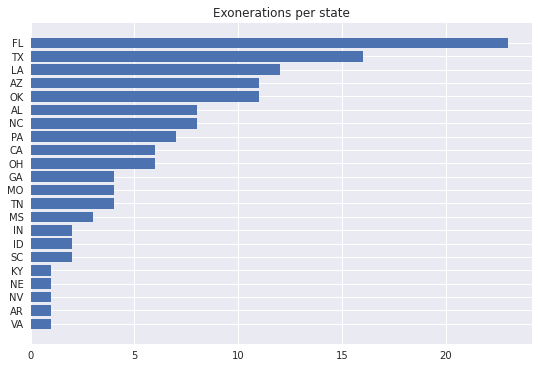

In [204]:
exon_state = total_est_exonerated.groupby('state')
exon_per_state = exon_state.count()
exon_per_state.reset_index(inplace=True)
asc_exon_per_state = exon_per_state.sort_values('exonerated', ascending=True)
plt.barh(asc_exon_per_state['state'], asc_exon_per_state['exonerated'])
plt.title('Exonerations per state');

Lets compare this to population by state we found above

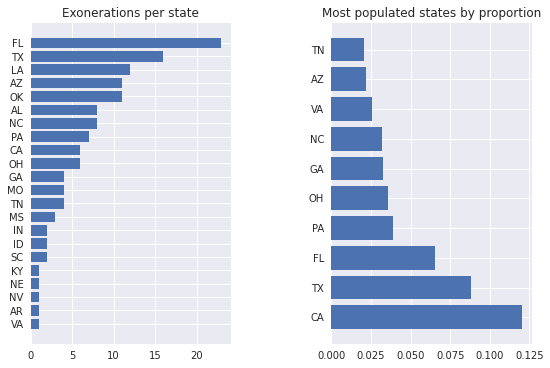

In [205]:
plt.style.use('seaborn')

x1 = asc_exon_per_state['state']
x2 = top_10_state_pops['state']
y1 = asc_exon_per_state['exonerated']
y2 = top_10_state_pops['US_population_proportion']

plt.subplot(1, 2, 1) 
plt.barh(x1, y1)
plt.title("Exonerations per state")


plt.subplot(1, 2, 2) 
plt.barh(x2, y2)
plt.title('Most populated states by proportion')

plt.subplots_adjust(wspace=0.5)
plt.show()

<AxesSubplot:xlabel='state'>

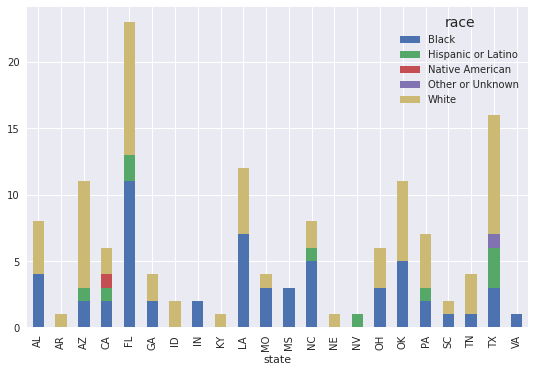

In [206]:
# number of individuals exonerated per state, by race
exonerated_bystate = total_est_exonerated.groupby(['state', 'race'])['state'].count().unstack('race').fillna(0)
exonerated_bystate.plot(kind='bar', stacked=True) 

From this graph you can see that mainly black and white inmates were exonerated. However, 48% of all death row inmates were white, whereas 39% were black; yet from the graph their exoneration counts look similiar, why could this be? Black people constitute for 13% of the American population, they make up 47% of the 1900 exonerations recorded in the National Registry of Exonerations (as of October 2016) <sup>(7)</sup>. 

Innocent black people are about seven times more likely to be convicted of murder than innocent white people. Convictions that led to murder exonerations with black defendants were 22% more likely to incude police misconduct than those with white defendants. Furthermore, those sentenced to death spent 4 years longer in prison before release and many innocent black people encounter institutional discrimination and bias throughout their ordeals. 

Does our data back up this information? We will compare the proportions of innocent black inmates per state and innocent white inmates per state.

In [207]:
race_exonerated = total_est_exonerated['race'].value_counts()
race_exonerated

White                 65
Black                 57
Hispanic or Latino    10
Other or Unknown      1 
Native American       1 
Name: race, dtype: int64

In [208]:
# exonerations per state
total_exonerations = total_est_exonerated['state'].value_counts()
total_exonerations

FL    23
TX    16
LA    12
AZ    11
OK    11
AL    8 
NC    8 
PA    7 
OH    6 
CA    6 
GA    4 
MO    4 
TN    4 
MS    3 
IN    2 
ID    2 
SC    2 
VA    1 
NE    1 
KY    1 
AR    1 
NV    1 
Name: state, dtype: int64

In [209]:
# number of black and white people who were exonerated per state
white = total_est_exonerated.loc[total_est_exonerated['race'] == 'White']
black = total_est_exonerated.loc[total_est_exonerated['race'] == 'Black']
white_grouped = white.groupby('state').count()
black_grouped = black.groupby('state').count()
white_exonerated = white_grouped['exonerated']
black_exonerated = black_grouped['exonerated']

In [210]:
black_white_perstate =pd.concat([black_exonerated, white_exonerated, total_exonerations], axis=1)
black_white_perstate.columns = ['Black Exonerated', 'White Exonerated', 'Total Exonerated']
final_black_white_perstate = black_white_perstate.fillna(0)
final_black_white_perstate

,Black Exonerated,White Exonerated,Total Exonerated
AL,4.0,4.0,8
AZ,2.0,8.0,11
CA,2.0,2.0,6
FL,11.0,10.0,23
GA,2.0,2.0,4
IN,2.0,0.0,2
LA,7.0,5.0,12
MO,3.0,1.0,4
MS,3.0,0.0,3
NC,5.0,2.0,8


Now we will work out the proportions of black and white exonerations by state.

In [211]:
final_black_white_perstate_copy = final_black_white_perstate.copy(deep=True)

black_exon_ratio = final_black_white_perstate.groupby('Black Exonerated')['Total Exonerated'].transform('sum')
white_exon_ratio = final_black_white_perstate.groupby('White Exonerated')['Total Exonerated'].transform('sum')
final_black_white_perstate_copy['Black Exoneration Proportion'] = final_black_white_perstate['Black Exonerated'].div(black_exon_ratio)
final_black_white_perstate_copy['White Exoneration Proportion'] = final_black_white_perstate['White Exonerated'].div(white_exon_ratio)
final_black_white_perstate_copy

,Black Exonerated,White Exonerated,Total Exonerated,Black Exoneration Proportion,White Exoneration Proportion
AL,4.0,4.0,8,0.500000,0.266667
AZ,2.0,8.0,11,0.066667,0.727273
CA,2.0,2.0,6,0.066667,0.100000
FL,11.0,10.0,23,0.478261,0.434783
GA,2.0,2.0,4,0.066667,0.100000
IN,2.0,0.0,2,0.066667,0.000000
LA,7.0,5.0,12,0.583333,0.416667
MO,3.0,1.0,4,0.103448,0.111111
MS,3.0,0.0,3,0.103448,0.000000
NC,5.0,2.0,8,0.263158,0.100000


Before conducting any tests, we will test for normality of data (using the Kolmogorov-Smirnoff test) and homogeneity of variance (using a Levenes test).

In [212]:
#test for normality of data
ks_test = stats.ks_2samp(final_black_white_perstate_copy['Black Exoneration Proportion'],
final_black_white_perstate_copy['White Exoneration Proportion'])
#test for homogeneity of variance
Levenes_test = stats.levene(final_black_white_perstate_copy['Black Exoneration Proportion'],
final_black_white_perstate_copy['White Exoneration Proportion'])

print(ks_test)
print(Levenes_test)

KstestResult(statistic=0.2727272727272727, pvalue=0.39373973565829246)
LeveneResult(statistic=0.7851353199829403, pvalue=0.3806206121615431)


Results show that our is not significantly different from a normal distribution and there’s no significant difference between the variances of the samples; therefore a parametric test can be performed.

We will perform an independent T-test to test whether the distributions between the exonerated black inmates and exonerated white inmates are equal. Our hypotheses are as follows:

## Null Hypothesis
The distributions between the proportions of exonerated black inmates and exonerated white inmates are equal.

## Alternate hypothesis
The distributions between the proportions of exonerated black inmates and exonerated white inmates are not equal.

In [213]:
stat = stats.ttest_ind(final_black_white_perstate_copy['Black Exoneration Proportion'],
final_black_white_perstate_copy['White Exoneration Proportion'])
print(stat)

Ttest_indResult(statistic=-1.2091765233474596, pvalue=0.2333580024582146)





## Conclusion -> exonerations

The results of our independent t-test show a p value of 0.23, which is greater than our significance level of 5%; therefore we accept our null hypothesis: the distributions between the proportions of exonerated black inmates and exonerated white inmates are equal. 
This result goes against previous studies. This could be due to the fact that our sample size was very small. Furthermore, the previous studies mainly spoke about the exonerations of black people within the whole judicial system, not just black peopledeath row (data on death row only could not be found).

# Conclusions -> Overall

#### Race
The proportions of races on death row that were executed were all fairly similar suggesting that race does not play a role in determining if someone on deathrow gets executed. 
However, we did find a link between race and age, with the proportion of black people being sentenced to death linearly decreasing with age, while a linear increase in white people sentenced to death by age.


#### Gender
Gender was found to be a big factor in if someone on deathrow actually gets executed, with significantly more males getting executed proportionally than females.
Additionally, a strong positive correlation was found between the proportion of females sentenced to death and their age, with older women more likely to be given the capital punishment.

#### Sentencing year
A near linear decrease was found between the proportion of people on death row executed and the year between 1980 to 2010. This was because less murders were carried out as well as better representation for people on deathrow.

#### Age
From the age of 25, a consistent decrease in the proportion of executions by age was found with older people being less likely to get executed, especially those over 50. A reason for this is due to over 50s more likely to be ill and fragile giving a case that it is immoral to execute an ill, old person.
Also, it was found that you can predict the likelihood from a logistic regression of getting executed from the age at sentencing, again this hows that the likelihood of survival increases with age.
Additionally race and age links were found along with gender and age described above. 

#### Finance
States with lower incomes are more likely to have a higher proportion of people on death row, a possible reason for this being increased crime rate (Becsi, 1999). Additionally Texas making the second biggest loss on income as well as having the highest proportion executed difference by some margin adds support that people from states with low income may be more likely to get executed due to a possibly classist judicial system.

#### Child abuse
States with higher rates of child abuse are not the states with higher proportions of people on death row suggesting child abuse does not play a factor here, refuting studies showing that child abuse does lead to changes in the developing brain in judgement and self control areas.
Also, no link was found between states with high child abuse and low or high income.

#### Education
States with lowest education scores at grade 4 and grade 8 level were mostly the states that had higher rates of people on death row. However this was not absolute.
Furthermore, grade 4 reading and grade 4 maths was able to reliably predict the grade 8 maths and reading average in a multiple regression.

#### Homelessness
States with higher homelessness rates were not the states with higher rates of people on deathrow, suggesting no link between the two.

#### Exonerations
The distributions between the proportions of exonerated black inmates and exonerated white inmates are equal. Innocent black people on death row were just as likely to be exonerated as innocent white people on death row.


# Areas for future research

- More research could be undertaken looking into what exactly child abuse does to the brain and how this impacts the childs criminal future. Previous research suggests that child abuse does increase the chance of them breaking the law, however, we found it does not effect them being given the capital punishment. Research could look into what sort of crimes victims of child abuse commit, if not murders worthy of capital punishment, do they commit lesser crimes?

- Education and capital punishment. Despite it looking like states with worse grades were the states with higher proportions on death row, some states had bad grades and had low peoportions, while other states had high grades and high proportions. Other factors are clearly in play, but just how much of an influence is education.

- Gender and executions -> this dataset has veery few females, could combine datasets in the future to get a bigger sample and therefore more reliable analysis.

- Look into if the problem is with the death penalty or with how the US implement it -> do other countries have similar problems?

- Unkown / other races dying more -> look into race gang culture in prisons

- Exonerations refute previous research -> Look deeper into why this is the case, why did previous research find white people are more likely to be exonerated 

- older women given capital punishment more -> Look further into reasons why younger women may be given the benefit of doubt more than older women.

# References
(1) The Intercept: https://theintercept.com/2019/12/03/death-penalty-capital-punishment-data/

(2) Data Is Plural: https://docs.google.com/spreadsheets/d/1wZhPLMCHKJvwOkP4juclhjFgqIY8fQFMemwKL2c64vk/edit#gid=0

(3) The Condemned Dataset: https://github.com/firstlookmedia/the-condemned-data?fbclid=IwAR1Vufp2iXCJCdTu8qBANnSiavR8hXceOVCNAwL7yeeQKf_Lyoqt4GdVSRI

(4) PBS: https://www.pbs.org/wgbh/pages/frontline/shows/execution/readings/texas.html

(5) American Civil Liberties Union: https://www.aclu.org/other/juveniles-and-death-penalty

(6) Death Penalty Information Center: https://deathpenaltyinfo.org/news/dpic-adds-eleven-cases-to-innocence-list-bringing-national-death-row-exoneration-total-to-185

(7) The National Registry of Exonerations: https://www.law.umich.edu/special/exoneration/Pages/Race.aspx 

(8) State population data set: https://www.kaggle.com/peretzcohen/2019-census-us-population-data-by-state

(9) State education data set: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

(10) State child abuse data set: https://healthdata.gov/dataset/National-Child-Abuse-and-Neglect-Data-System-NCAND/rqtm-8izs

(11) Homeless data set: https://www.kaggle.com/umerkk12/homelessness-in-us

(12) (Millhiser, 2020. The decline and fall of the American death penalty. https://www.vox.com/2020/12/30/22187578/death-penalty-united-states-executions-decline-gregg-georgia-bucklew-precythe)

(13) Chandler, K. 2018. Aging death row: Is executing old or infirm inmates cruel? https://apnews.com/article/d4d2040cceed48529d17cc33438a72cd

(14) Becsi, Z. (1999). Economics and Crime in the States. Economic Review-Federal Reserve Bank of Atlanta, 84(1), 38.

(15) Coding for data - 2020 edition (https://matthew-brett.github.io/cfd2020/intro.html)

(16) Kruttschnitt, Candace, McCarthy, Daniel, (1985) Familial Social Control and Pretrial Sanctions: Does Sex Really Matter? 
The Journal of Criminal Law and Criminology (1973-)

(17) https://deathpenaltyinfo.org/policy-issues/race

(18) Mallory, Jason L. (2015) ‘Denying Pell Grants to Prisoners: Race, Class, and the Philosophy of Mass Incarceration.’ International Social Science Review, 90(1), pp. 1–27

(19) Gross, S., Possley, M. and Stephens, K., 2017. Race and Wrongful Convictions in The United States, National Registry of Exonerations, [online] Law.umich.edu. Available at: <http://www.law.umich.edu/special/exoneration/Documents/Race_and_Wrongful_Convictions.pdf>

(20) Noll, D. (2011). Building a new identity: Race, gangs, and violence in California prisons. U. Miami L. Rev., 66, 847.

(21) Katsiyannis, A., Thompson, M. P., Barrett, D. E., & Kingree, J. B. (2013). School predictors of violent criminality in adulthood: Findings from a nationally representative longitudinal study. Remedial and special education, 34(4), 205-214.

(22) Nixon, J., Pearn, J., Wilkey, I., & Petrie, G. (1981). Social class and violent child death: An analysis of fatal nonaccidental injury, murder, and fatal child neglect. Child Abuse & Neglect, 5(2), 111-116.

(23) Dunaway, R. G., Cullen, F. T., Burton Jr, V. S., & Evans, T. D. (2000). The myth of social class and crime revisited: An examination of class and adult criminality. Criminology, 38(2), 589-632.

(24) Pruett, N. S. (1990). Mental illness and homelessness as predictors of criminality: A secondary analysis of 728 male jail detainees (Doctoral dissertation, Northwestern University).


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f184a0b5-fb91-4bc4-9743-91832a863273' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>